IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
from imageio import imread

import warnings
warnings.filterwarnings("ignore")

IMPORT DATASET

In [2]:
xdf = pd.read_csv("games.csv")

In [3]:
xdf

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [4]:
xdf.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
xdf.shape

(1512, 14)

1512 rows of data and 14 variables

In [6]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


Removing unnecessary columns/variables

In [7]:
dataG = xdf[[
      'Title',
      'Release Date',
      'Number of Reviews',
      'Genres',
      'Summary',
      'Reviews',
      'Rating',
      'Playing',
      'Backlogs',
      'Wishlist',
      'Plays']]
dataG.head()

,Title,Release Date,Number of Reviews,Genres,Summary,Reviews,Rating,Playing,Backlogs,Wishlist,Plays
0,Elden Ring,"Feb 25, 2022",3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3.8K,4.6K,4.8K,17K
1,Hades,"Dec 10, 2019",2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3.2K,6.3K,3.6K,21K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2.5K,5K,2.6K,30K
3,Undertale,"Sep 15, 2015",3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679,4.9K,1.8K,28K
4,Hollow Knight,"Feb 24, 2017",3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2.4K,8.3K,2.3K,21K


DATA CLEANING (Handling of NULL rows)

In [8]:
dataG.isnull().sum()

Title                 0
Release Date          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Rating               13
Playing               0
Backlogs              0
Wishlist              0
Plays                 0
dtype: int64

In [9]:
dataG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Number of Reviews  1512 non-null   object 
 3   Genres             1512 non-null   object 
 4   Summary            1511 non-null   object 
 5   Reviews            1512 non-null   object 
 6   Rating             1499 non-null   float64
 7   Playing            1512 non-null   object 
 8   Backlogs           1512 non-null   object 
 9   Wishlist           1512 non-null   object 
 10  Plays              1512 non-null   object 
dtypes: float64(1), object(10)
memory usage: 130.1+ KB


In [10]:
#removing rows with NULL value
#for example, games with no reviews

In [11]:
#drop all NULL values
dataG=dataG.dropna()

#reset index rows of dataframe to avoid non-consecutive index values
dataG=dataG.reset_index(drop=True)

print(f"Shape of new dataset is: {dataG.shape}")

Shape of new dataset is: (1499, 11)


In [12]:
#there were 13 rows wil null values
#Double checking if there are any null values left in the dataset
dataG.isnull().values.any()


False

DATA CLEANING

Changing of String release of Date to integer datatype with year only

In [13]:
#Extract year from release data and drop Release date column
import datetime

def extract_year(date_str):
    try:
        date_object = datetime.datetime.strptime(date_str, "%b %d, %Y")
        return date_object.year
    except ValueError:
        return pd.NA  # Handle potential format errors (optional)

dataG['Year'] = dataG['Release Date'].apply(extract_year)
#dataG.drop('Release Date',axis=1) 
data=dataG.drop('Release Date',axis=1) 
data.head()

,Title,Number of Reviews,Genres,Summary,Reviews,Rating,Playing,Backlogs,Wishlist,Plays,Year
0,Elden Ring,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3.8K,4.6K,4.8K,17K,2022
1,Hades,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3.2K,6.3K,3.6K,21K,2019
2,The Legend of Zelda: Breath of the Wild,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2.5K,5K,2.6K,30K,2017
3,Undertale,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679,4.9K,1.8K,28K,2015
4,Hollow Knight,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2.4K,8.3K,2.3K,21K,2017


In [14]:
data.isnull().values.any()

True

In [15]:
#Release date column contain strings with "releases on TBD" which means the game has not been released yet
#extracting the year from this column cause this string value to be null and now we also have to remove the rows containing it
#drop all NULL values
data=data.dropna()

#reset index rows of datframe to avoid non-consecutive index values
data=data.reset_index(drop=True)

#convert date column from string to int
data['Year']=data['Year'].astype(int)
#df['points'] = df['points'].astype(str).astype(int)

print(f"Shape of new dataset is: {data.shape}")


Shape of new dataset is: (1497, 11)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1497 non-null   object 
 1   Number of Reviews  1497 non-null   object 
 2   Genres             1497 non-null   object 
 3   Summary            1497 non-null   object 
 4   Reviews            1497 non-null   object 
 5   Rating             1497 non-null   float64
 6   Playing            1497 non-null   object 
 7   Backlogs           1497 non-null   object 
 8   Wishlist           1497 non-null   object 
 9   Plays              1497 non-null   object 
 10  Year               1497 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 122.9+ KB


Changing of string values to integers value for numerical variables

In [17]:
# Converts the numbers with K to multiple by 1000 and convert into whole integers since K = 1000. Eg. 1K = 1 * 1000
def extract_value(value_str):
    if value_str.upper().endswith('K'):
        value_str = value_str[:-1]
        value_num = float(value_str) * 1000
    else:
        value_num = float(value_str)
    return value_num


Combining columns/variables to create new variables

In [18]:
games_clean = data.copy()

#replaces K for 1000
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace("K","000")
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace(".","")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace("K","000")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace(".","")

games_clean[['Backlogs', 'Wishlist']] = games_clean[['Backlogs', 'Wishlist']].apply(pd.to_numeric)

#combines column backlogs and wishlist
#for people who are interested
games_clean['Interested'] = games_clean["Backlogs"] + games_clean["Wishlist"]
games_clean['Playing']=games_clean['Playing'].apply(extract_value)
games_clean['Total Plays']=games_clean['Plays'].apply(extract_value)
games_clean['Review_count']=games_clean['Number of Reviews'].apply(extract_value)

#convert to float (except year) for consistency
games_clean['Playing']=games_clean['Playing'].astype(float)
games_clean['Interested']=games_clean['Interested'].astype(float)
games_clean['Total Plays']=games_clean['Total Plays'].astype(float)
games_clean['Review_count']=games_clean['Review_count'].astype(float)

#removes Playing, Backlogs, and Wishlist from df
games_clean.pop("Backlogs")
games_clean.pop("Wishlist")
#games_clean.pop("Playing")
games_clean.pop("Plays")
games_clean.pop("Number of Reviews")


games_clean.head()

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count
0,Elden Ring,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3800.0,2022,94000.0,17000.0,3900.0
1,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3200.0,2019,99000.0,21000.0,2900.0
2,The Legend of Zelda: Breath of the Wild,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2500.0,2017,31000.0,30000.0,4300.0
3,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679.0,2015,67000.0,28000.0,3500.0
4,Hollow Knight,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2400.0,2017,106000.0,21000.0,3000.0


In [19]:
# Check if there are any other NULL values
games_clean.info()
games_clean.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1497 non-null   object 
 1   Genres        1497 non-null   object 
 2   Summary       1497 non-null   object 
 3   Reviews       1497 non-null   object 
 4   Rating        1497 non-null   float64
 5   Playing       1497 non-null   float64
 6   Year          1497 non-null   int32  
 7   Interested    1497 non-null   float64
 8   Total Plays   1497 non-null   float64
 9   Review_count  1497 non-null   float64
dtypes: float64(5), int32(1), object(4)
memory usage: 111.2+ KB


False

Adding columns from another column/variable for easier usage of data

In [20]:
split_Genres = games_clean.copy()

unique_genres = set()
for genres_str in split_Genres['Genres']:
    genres_list = eval(genres_str)  # Convert string representation of list to actual list
    unique_genres.update(genres_list)

# Create new columns for each unique genre
for genre in unique_genres:
    split_Genres[genre] = 0

# Iterate over each row to populate the new genre columns
for index, row in games_clean.iterrows():
    genres_list = eval(row['Genres'])  # Convert string representation of list to actual list
    for genre in genres_list:
        split_Genres.at[index, genre] = 1
        
#drop genre column
#split_Genres.pop("Genres")

In [21]:
#Check if there are any empty info in the data.
games_clean.isna().sum()

Title           0
Genres          0
Summary         0
Reviews         0
Rating          0
Playing         0
Year            0
Interested      0
Total Plays     0
Review_count    0
dtype: int64

In [22]:
games_clean=split_Genres.copy()

NLP Part

Cleaning text from random unicode characters (In this case is the []), and keeping only letters, numbers, spaces. Applies to summary and reviews

In [23]:
def decode(column):
    column = column.str.decode("unicode_escape")\
    .str.replace(r'[^a-zA-Z1-9\ ]', '', regex=True).str.strip()
    return column

In [24]:
games_clean.loc[:,"Summary"] = decode(games_clean["Summary"])
games_clean.loc[:,"Reviews"] = decode(games_clean["Reviews"])

This part of the code removes ONLY completely non-english reviews, basically games with reviews that does not contain english. Games with reviews with english reviews will still stay.
It detects which reviews are in English. Puts the english reviews in a new dataframe called english_reviews

In [25]:
# Function to detect the language of a review using langid with confidence threshold
def detect_language_with_langdetect(line): 
    from langdetect import detect_langs
    try: 
        langs = detect_langs(line) 
        for item in langs: 
            # The first one returned is usually the one that has the highest probability
            return item.lang, item.prob 
    except: return "err", 0.0 

# Apply language detection to each review and add a 'IsEnglish' column to the DataFrame
games_clean['LanguageDetection'] = games_clean['Reviews'].apply(detect_language_with_langdetect)

#Filter out non-English reviews based on the threshold
english_reviews = games_clean[games_clean['LanguageDetection'].apply(lambda x: x[0] == 'en' and x[1] >= 0.8)]
games_clean = english_reviews

# Output the results with language and confidence percentages
# for idx, (lang, confidence) in enumerate(english_reviews['LanguageDetection']):
#     print(f"Review {idx + 1}: Language={lang}, Confidence={confidence:.2%}")

# print(games_clean)

Why not remove the Spanish Words? 
The sentiment values are still valid. As long as the review contains english words, the sentiment analysis will still use those english words and evaluate whether the reviews are positive or negative. From some games (Eg. 1482, Dragon Ball GT: Final Bout), the sentiment values were below 0, indicating a negative review. Although these reviews contained spanish words, the sentiment values were still correct judging by the english sentences that were in these reviews.

To make the sentiment value more useful, we will find games that are above 4.0 rating containing the top words from the summary of games extracted from positive reviews. This will give us a more accurate result of what are the top and popular/highly rated games the people are looking out for.

In [26]:
print(games_clean.tail(20).to_string())

                                Title                                                               Genres                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Resets the index after cleaning of random unicode characters is done

In [27]:
games_clean.reset_index(inplace=True, drop=True)
games_clean.head()

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count,...,Adventure,Simulator,Music,Racing,Indie,Arcade,Brawler,Tactical,RPG,LanguageDetection
0,Elden Ring,"['Adventure', 'RPG']",Elden Ring is a fantasy action and open world ...,The first playthrough of elden ring is one of ...,4.5,3800.0,2022,94000.0,17000.0,3900.0,...,1,0,0,0,0,0,0,0,1,"(en, 0.9999973019652274)"
1,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",A roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...,4.3,3200.0,2019,99000.0,21000.0,2900.0,...,1,0,0,0,1,0,1,0,1,"(en, 0.9999962989496092)"
2,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A small child falls into the Underground where...,soundtrack is tied for 1 with nier automata a...,4.2,679.0,2015,67000.0,28000.0,3500.0,...,1,0,0,0,1,0,0,0,1,"(en, 0.9999978910952749)"
3,Hollow Knight,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,4.4,2400.0,2017,106000.0,21000.0,3000.0,...,1,0,0,0,1,0,0,0,0,"(en, 0.9999986846067559)"
4,Minecraft,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it Unfortunately...,4.3,1800.0,2011,11230.0,33000.0,2300.0,...,1,1,0,0,0,0,0,0,0,"(en, 0.9999969015601613)"


Processes incoming text data using spacy to determine the base form of each word in summary & reviews, then returns a list of lemmatized words.  
Lemmatized words are one single form word.
Eg.  "builds", "building",or "built" to the lemma "build"

In [28]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_punct]
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

# games_clean['Reviews'] = games_clean['Reviews'].apply(lemmatize)

Here, we are using TextBlob to indicate whether the reviews in the dataset lean towards positive or negative. 
If a sentiment value is above 0, it means it is a positive review.
If it's below 0, it indicates a negative value.
The range of sentiment value is [-1, 1]. The value that is closer to -1 or 1 indicates stronger positive/negative sentiments.

In [29]:
from textblob import TextBlob

# Function to calculate sentiment polarity using TextBlob
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review and add a 'Sentiment' column to the DataFrame
games_clean['Sentiment'] = games_clean['Reviews'].apply(get_sentiment)

# Filter positive reviews based on sentiment polarity
positive_reviews = games_clean[games_clean['Sentiment'] > 0]['Reviews']

Converts text data to TF-IDF vectors.
 
TF-IDF is a measure that "evaluates how relevant a word is to a document in a collection of documents". It increases proportionally to the number of times a word appears in a dataset, but is offset by the number of datasets that contain the word.
Example: Words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

This code creates a matrix with TF-IDF weights for each word. 
Obtains a list of feature names that represent which words are included in these vectors. 

Instead of comparing multiple datasets, will try comparing between reviews and summary to determine the relevancy of the words. From there, can roughly determine which words are relevant and appear very frequently, giving us a gauge of what kind of games people usually prefer and what kind of audience the games generally cater to.

Now let's do it for reviews. Here we are using only positive reviews to get a gauge of what kind of games people usually praise


In [30]:
tfidf_positive = TfidfVectorizer(stop_words="english", tokenizer=lemmatize) #Reduces common words like 'and', 'the' etc as it is not significant.
tfidf_matrix_positive = tfidf_positive.fit_transform(positive_reviews)
feature_names_positive = tfidf_positive.get_feature_names_out()

In [31]:
# Calculate TF-IDF scores for each word in the positive reviews.
tfidf_scores_positive = tfidf_matrix_positive.sum(axis=0)

# Create a DataFrame to display common words and their TF-IDF scores in positive reviews.
common_words_positive = pd.DataFrame(tfidf_scores_positive, columns=feature_names_positive).transpose()
common_words_positive.columns = ['TF-IDF Score']

# Filter out empty strings and whitespace characters.
common_words_positive = common_words_positive[common_words_positive.index.str.strip() != '']

# Filter out specifc number of letters from words. 4 because 1-4 words usually consists of generic words that are redundant.
common_words_positive = common_words_positive[common_words_positive.index.str.len() > 4]

# Sort the DataFrame by TF-IDF score in descending order.
common_words_positive = common_words_positive.sort_values(by='TF-IDF Score', ascending=False)

# Display top common words without blank spaces and single-letter words.
top_common_words_positive = common_words_positive.head(20)
print(top_common_words_positive)

            TF-IDF Score
really         34.648790
story          30.207012
great          27.602341
character      24.799307
gameplay       23.371829
think          21.729189
pretty         20.235249
level          19.941292
world          17.362615
series         16.855709
design         16.819791
mario          16.778054
combat         16.714201
experience     16.184940
thing          14.496732
little         13.802824
enjoy          13.588375
amazing        13.549412
favorite       13.349948
original       12.860194


The code below extracts key words from Summary. The summary selected are from the positive reviews that we have identified previously. This would give a better gauge of what types of games the people are favouring based on the summary of the game description.

In [32]:
# Filter games with positive reviews.
positive_games = games_clean[games_clean['Sentiment'] > 0]

# Extract Summary text from games with positive reviews
positive_summary_text = positive_games['Summary']

In [33]:
tfidf_positive_summary = TfidfVectorizer(stop_words="english", tokenizer=lemmatize)
tfidf_matrix_positive_summary = tfidf_positive_summary.fit_transform(positive_summary_text)
feature_names_positive_summary = tfidf_positive_summary.get_feature_names_out()

In [34]:
non_empty_feature_indices = [i for i, name in enumerate(feature_names_positive_summary) if name.strip() != '']

# Filter the TF-IDF matrix and feature names
tfidf_matrix_filtered = tfidf_matrix_positive_summary[:, non_empty_feature_indices]
feature_names_filtered = [feature_names_positive_summary[i] for i in non_empty_feature_indices]

In [35]:
# Calculate TF-IDF scores for each word in the positive summary text
tfidf_scores_positive_summary = tfidf_matrix_positive_summary.sum(axis=0)

# Create a DataFrame to display common words and their TF-IDF scores in positive summary text
common_words_positive_summary = pd.DataFrame(tfidf_scores_positive_summary, columns=feature_names_positive_summary).transpose()
common_words_positive_summary.columns = ['TF-IDF Score']

# Filter out empty strings and whitespace characters (optional)
common_words_positive_summary = common_words_positive_summary[common_words_positive_summary.index.str.strip() != '']

# Filter out specific number of letters from words (optional)
common_words_positive_summary = common_words_positive_summary[common_words_positive_summary.index.str.len() > 4]

# Sort the DataFrame by TF-IDF score
common_words_positive_summary = common_words_positive_summary.sort_values(by='TF-IDF Score', ascending=False)

# Display the top common words in positive summary text without blank spaces and single-letter words
top_common_words_positive_summary = common_words_positive_summary.head(20)
print(top_common_words_positive_summary)

            TF-IDF Score
player         29.672919
world          27.507760
character      20.051542
story          19.949785
mario          18.489737
series         18.035076
feature        17.997093
adventure      17.985364
pokmon         16.095286
action         15.839428
experience     15.475399
fight          15.343495
battle         14.591072
gameplay       14.475729
explore        13.667575
enemy          12.757050
combat         12.479728
super          11.836440
version        11.788502
release        11.494740


In [36]:
positive_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1405
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1177 non-null   object 
 1   Genres               1177 non-null   object 
 2   Summary              1177 non-null   object 
 3   Reviews              1177 non-null   object 
 4   Rating               1177 non-null   float64
 5   Playing              1177 non-null   float64
 6   Year                 1177 non-null   int32  
 7   Interested           1177 non-null   float64
 8   Total Plays          1177 non-null   float64
 9   Review_count         1177 non-null   float64
 10  Turn Based Strategy  1177 non-null   int64  
 11  Platform             1177 non-null   int64  
 12  Visual Novel         1177 non-null   int64  
 13  Fighting             1177 non-null   int64  
 14  MOBA                 1177 non-null   int64  
 15  Point-and-Click      1177 non-null   i

In [37]:
from sklearn.cluster import KMeans

# Step 3: Feature Selection
features = positive_games[['Rating', 
                 'Interested', 
                 'Playing']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
#pipeline = make_pipeline(StandardScaler(), kmeans)
kmeans.fit(features)
#clusters = pipeline.fit_predict(features)
cluster3_1 = kmeans.predict(features)

According to the correlation matrix, The players who are interested but have not played the game and the people who are currently still playing the game have a moderately positive strong relation R=0.65
That means, the more people who are interested in playin the game, the more people who would be currently playing in this period of time. 
Regardless of the weak relationship between Ratings and these 2 variables, I wanted to use them in a cluster together to provide insight in the games' current success via number of players still playing their game and their rating (performace and appeal) while also looking for its potential for growth.
Games with high player engagement and a large number of interested players may represent high-demand titles.

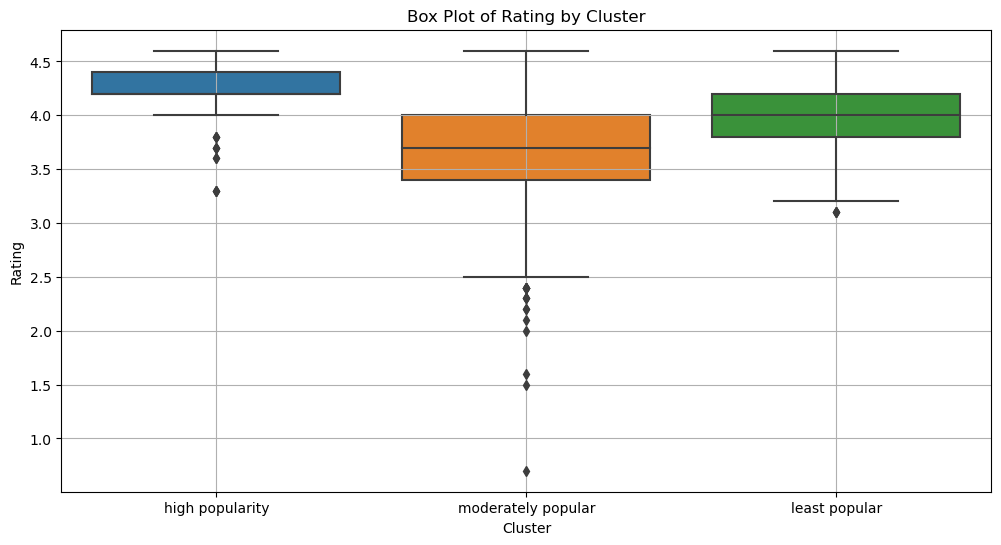

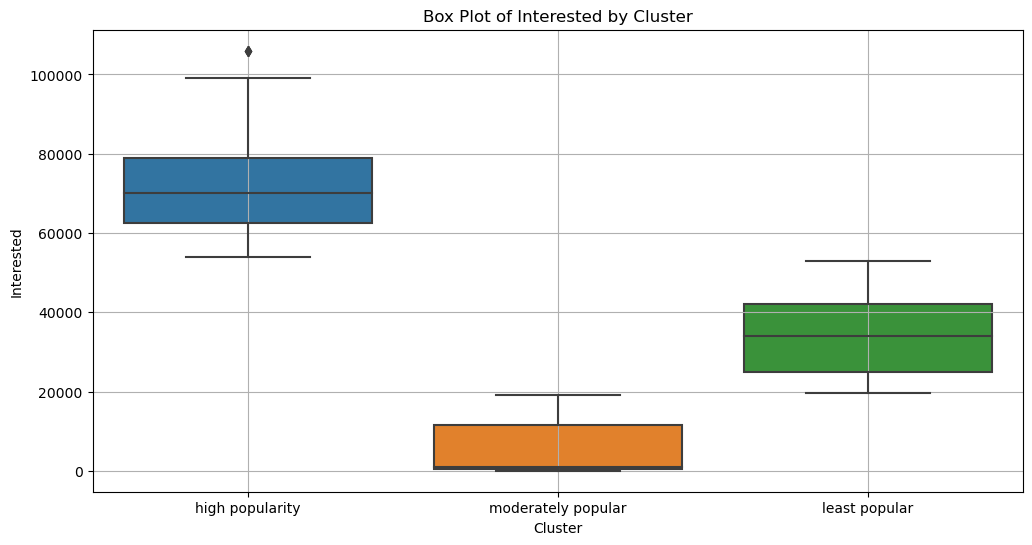

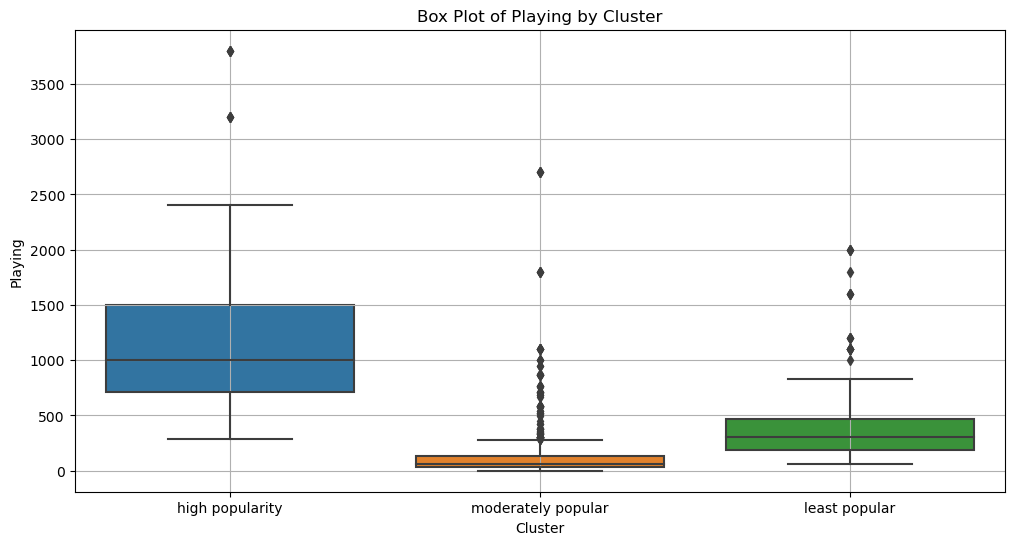

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cluster_labels = {0: 'least popular', 1: 'moderately popular', 2: 'high popularity'}

positive_games['cluster3_1']=cluster3_1
# Create box plots for each feature, grouped by cluster
for feature in features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster3_1'].map(cluster_labels), y=feature, data=positive_games)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

I chose to have 3 groups for the cluster to represent 3 things

0. Games that have no player engagement or potentially just niche games (due to low number of potential players), furthermore with mixed or mostly low ratings compared to the other games
1. Moderately Engaged games with growth potential. This group has moderate player engagement and moderate number of people who are interested in playing while having mixed rating with mostly high rating compared to the rest of the games
2. Games that Highly engaged and strong interest from potential players while also performing well with its high ratings
Games from group 0 are likely to have limited success in the market. These games have low player engagement and a small number of potential players interested in playing them. Furthermore, their mixed or mostly low ratings suggest that they may not appeal to a broad audience and may be considered niche or less popular games.

Group 1 represents games with moderate player engagement and growth potential. While these games may not have the same level of success as those in group 2, they still have a decent level of player engagement and interest from potential players. Their mixed ratings indicate that they have potential for improvement and could attract a larger audience with targeted marketing or updates.

Games from group 2 represent strong candidates for success in the market, as they have already demonstrated high levels of engagement among current players and strong interest from potential players. Additionally, their positive ratings indicate that they are well-received by players, further increasing their likelihood of success.

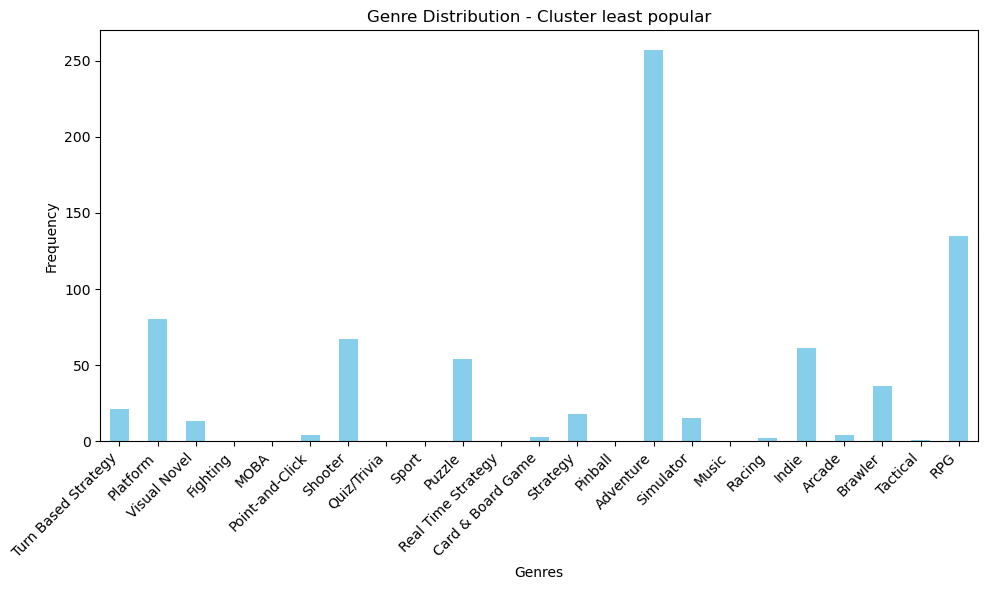

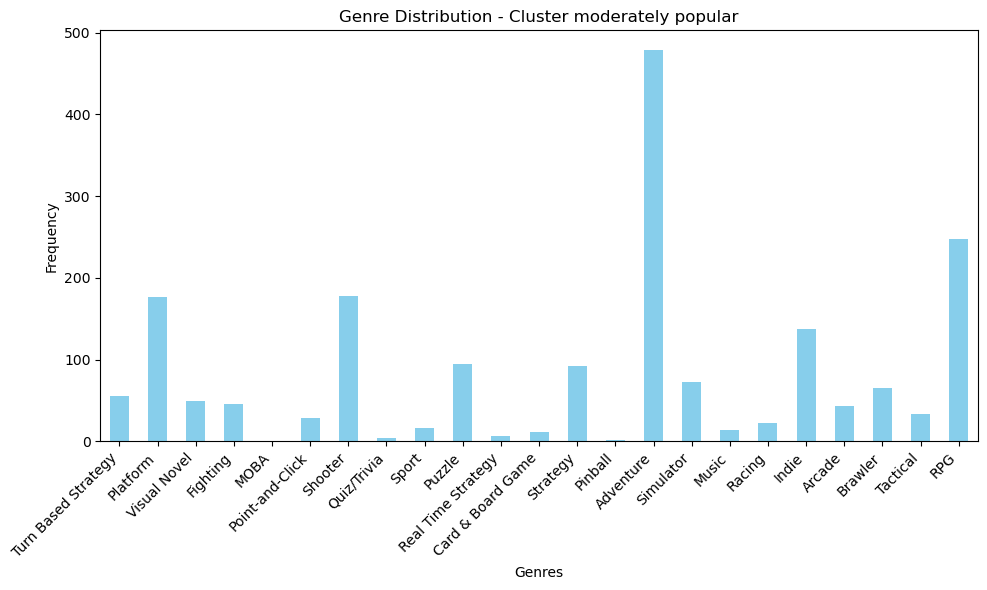

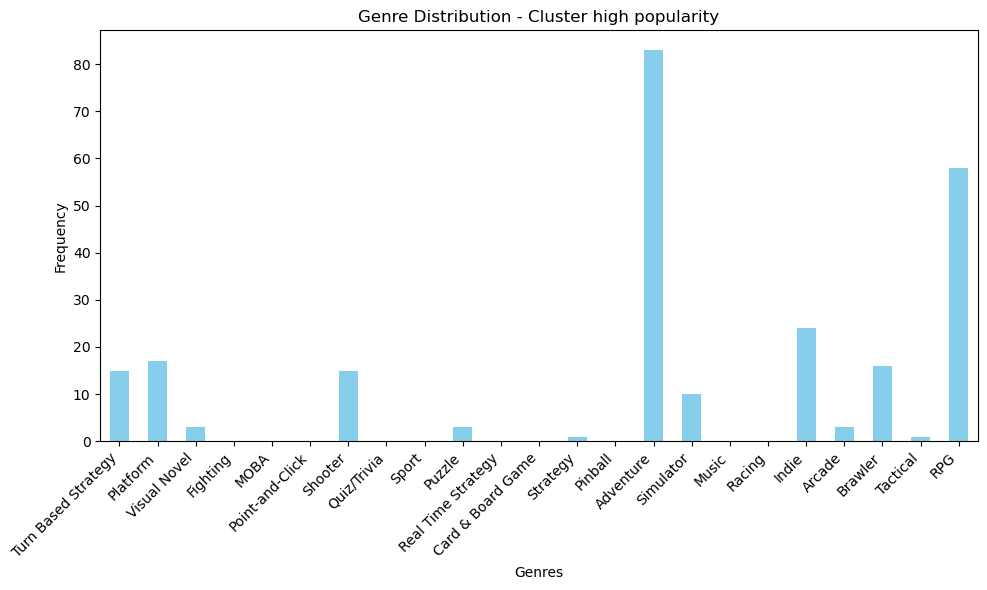

In [39]:
genre_columns = positive_games.columns[10:33]#first genre in col 10 to col 33
genre_data = positive_games[genre_columns]
grouped_data = positive_games.groupby('cluster3_1')

# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    cluster_genre_frequencies.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

In [40]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features, cluster3_1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6716029918520534


 The silhouette score measures how well-separated the clusters are. It ranges from -1 to 1, where a score closer to 1 indicates that data points are well-clustered, a score around 0 suggests overlapping clusters, and negative scores indicate that data points may have been assigned to the wrong clusters.
 
A silhouette score of 0.67 indicates a relatively good clustering result. It indicates that the majority of data points are well-clustered and assigned to the correct clusters, with some potential for improvement. It also suggests that the clustering algorithm has successfully separated the data into distinct clusters with relatively minimal overlap. However, further analysis and refinement may still be beneficial to optimize the clustering results.

#IMPROVING CLUSTER

I wanted to see if adding more variables for the clusters would help to seperate the genres better.
hence, I decided to cluster games based on variables review count, interest level, current player count, total player count, and rating.

The first 4 variable have at least correlation 0.65 with each other which means they are all highly correlated which indicates that they share similar patterns or trends in the data. This better ensures that games with similar levels of engagement across multiple dimensions are grouped together, leading to more cohesive and meaningful clusters.

Furthermore, by including multiple variables that measure different aspects of player engagement (reviews_count, interest, and active player counts, total number of people who have played), the resulting clusters provide a more comprehensive representation of game engagement. This allows for a more nuanced understanding of player behavior and preferences.

Review count, interest level, and player counts represent different facets of a game's popularity and appeal. Review count reflects the level of feedback and attention the game has received from players, while interest level and player counts indicate the level of current and past player engagement.

Adding the rating variable to the clustering analysis, despite its low correlation with the other variables would still add value for the clustering. Ratings provide a direct measure of the perceived quality or satisfaction level of a game among players. Even if ratings are not strongly correlated with other variables such as player engagement or interest, they still offer valuable information about the overall reception and success of a game.

The 3 groups will still represent the same things as the previous cluster

In [41]:
positive_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1405
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1177 non-null   object 
 1   Genres               1177 non-null   object 
 2   Summary              1177 non-null   object 
 3   Reviews              1177 non-null   object 
 4   Rating               1177 non-null   float64
 5   Playing              1177 non-null   float64
 6   Year                 1177 non-null   int32  
 7   Interested           1177 non-null   float64
 8   Total Plays          1177 non-null   float64
 9   Review_count         1177 non-null   float64
 10  Turn Based Strategy  1177 non-null   int64  
 11  Platform             1177 non-null   int64  
 12  Visual Novel         1177 non-null   int64  
 13  Fighting             1177 non-null   int64  
 14  MOBA                 1177 non-null   int64  
 15  Point-and-Click      1177 non-null   i

In [42]:
from sklearn.cluster import KMeans

# Step 3: Feature Selection
features2 = positive_games[['Rating', 
                 'Interested', 'Review_count',
                 'Playing', 'Total Plays']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features2)
cluster5_2 = kmeans.predict(features2)

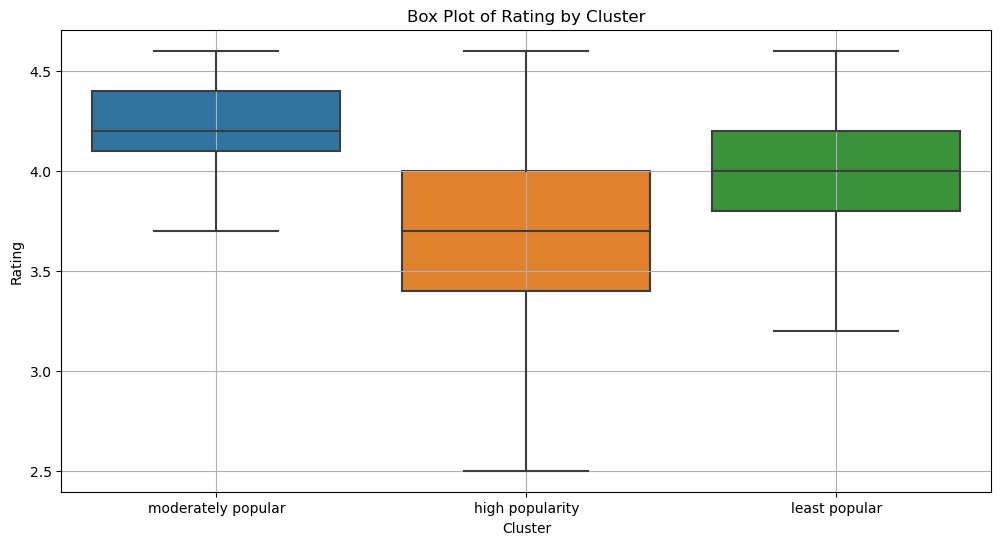

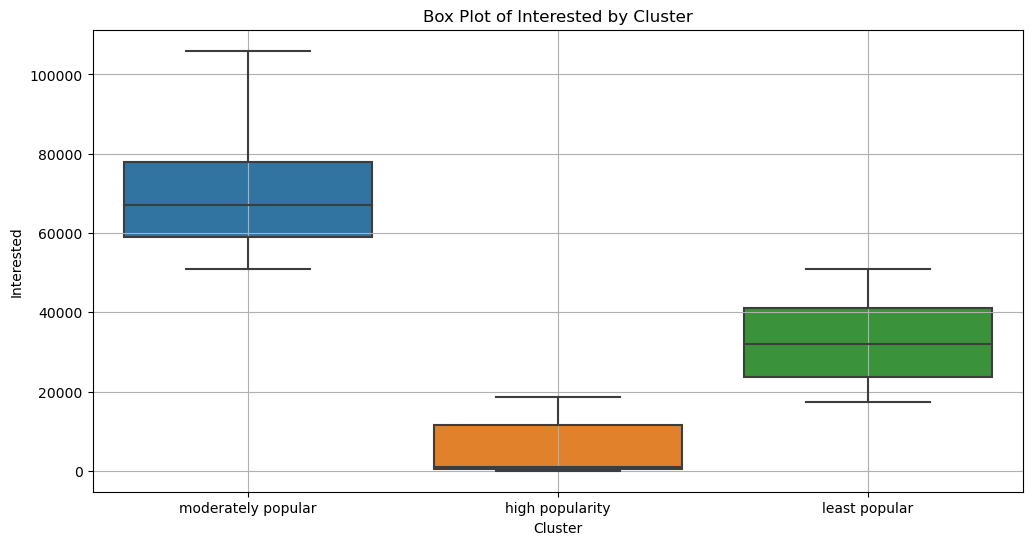

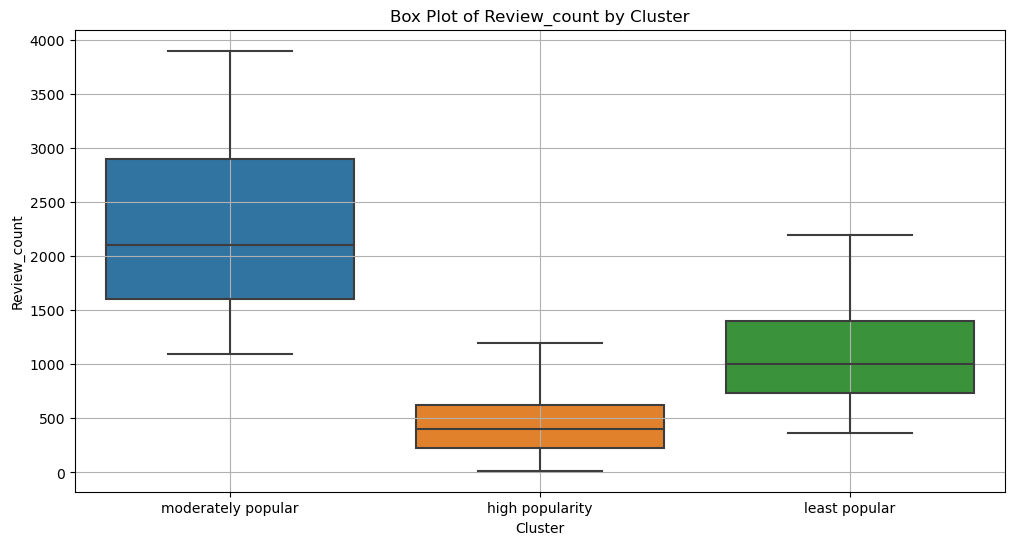

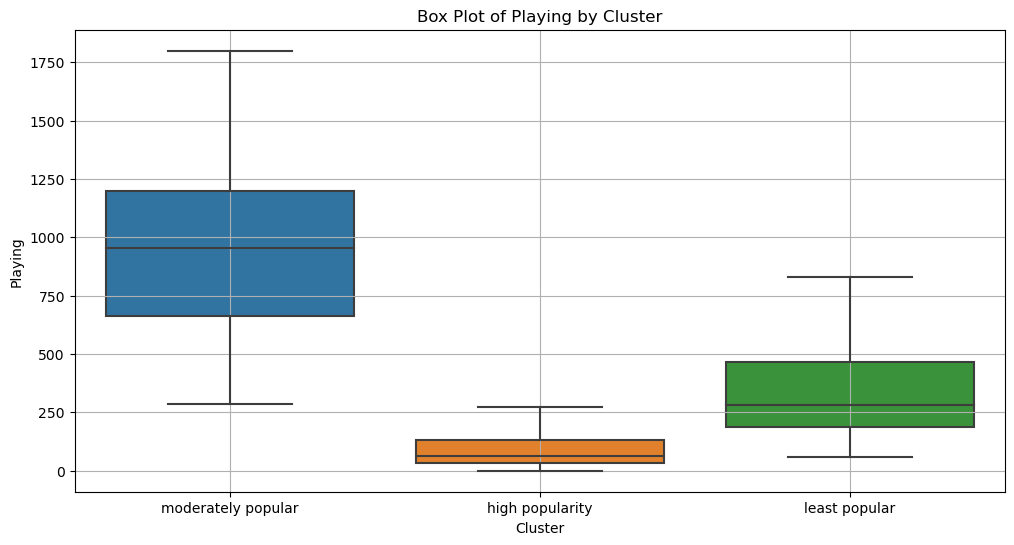

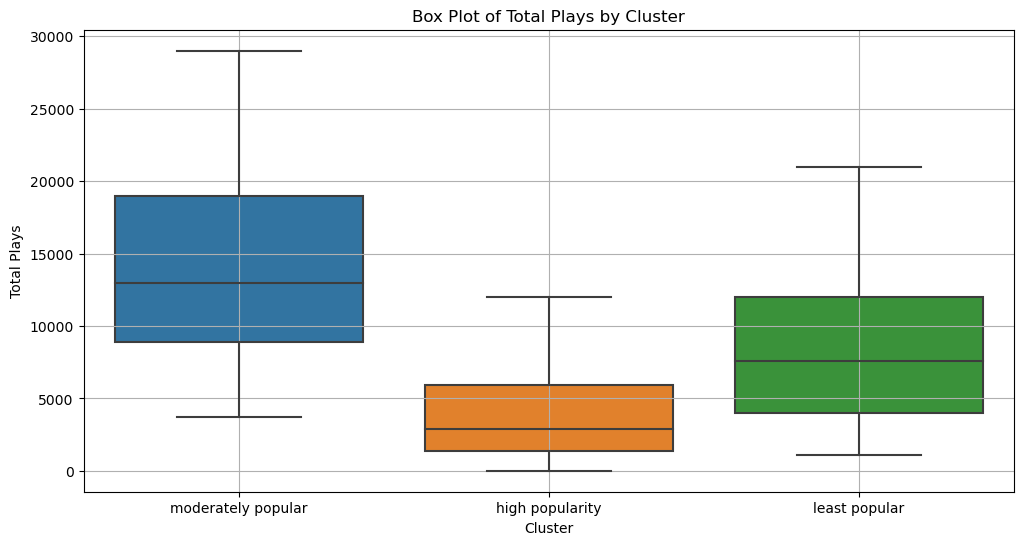

In [43]:
positive_games['cluster5_2']=cluster5_2
# Create box plots for each feature, grouped by cluster
cluster_labels = {0: 'least popular', 2: 'moderately popular', 1: 'high popularity'}

for feature in features2:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster5_2'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

In [44]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features2, cluster5_2)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.596846018543463


I have decided to remove total plays from cluster as it is the variable with the most overlapping clusters as it lowered the silhouette score from before

In [45]:
# Step 3: Feature Selection
features3 = positive_games[['Rating', 
                 'Interested', 'Review_count',
                 'Playing']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features3)
cluster4_3 = kmeans.predict(features3)

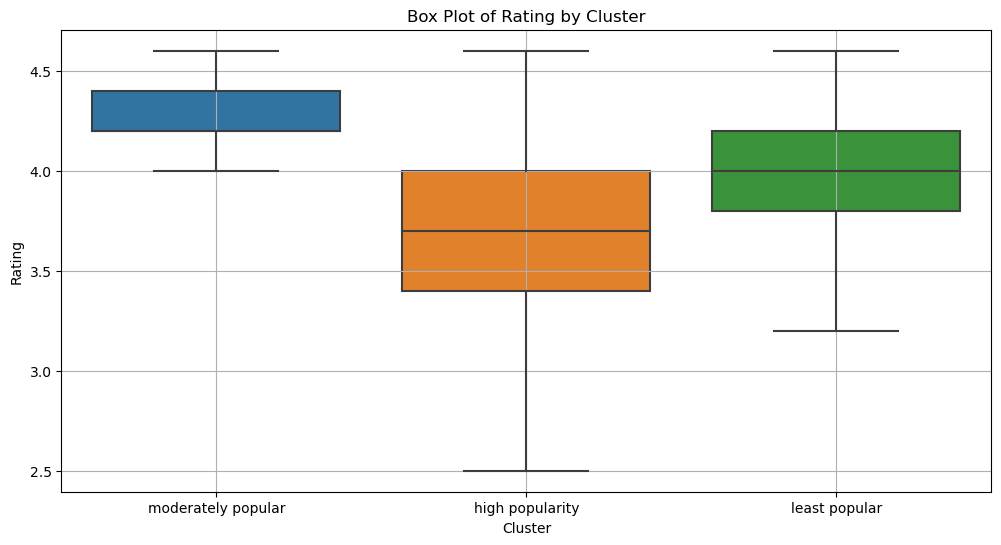

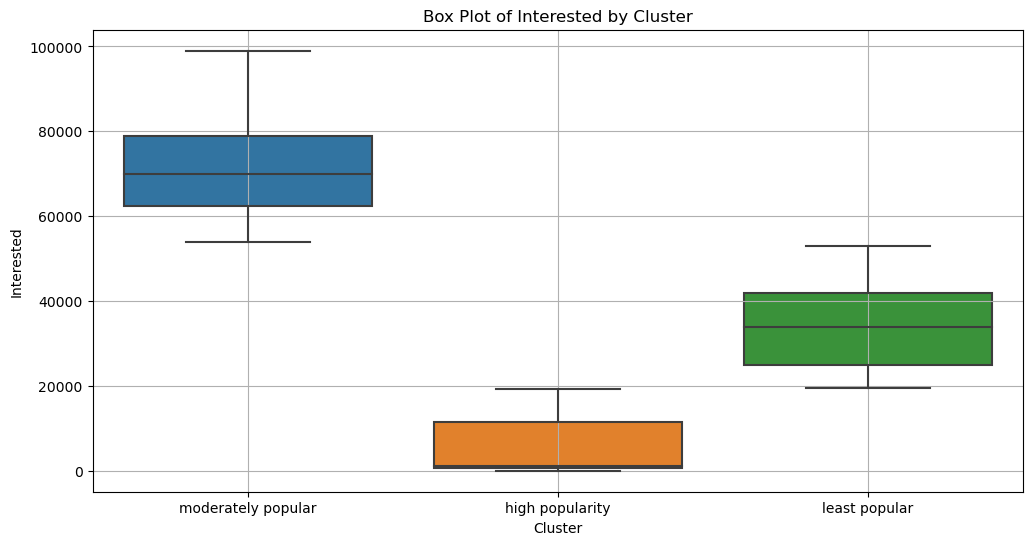

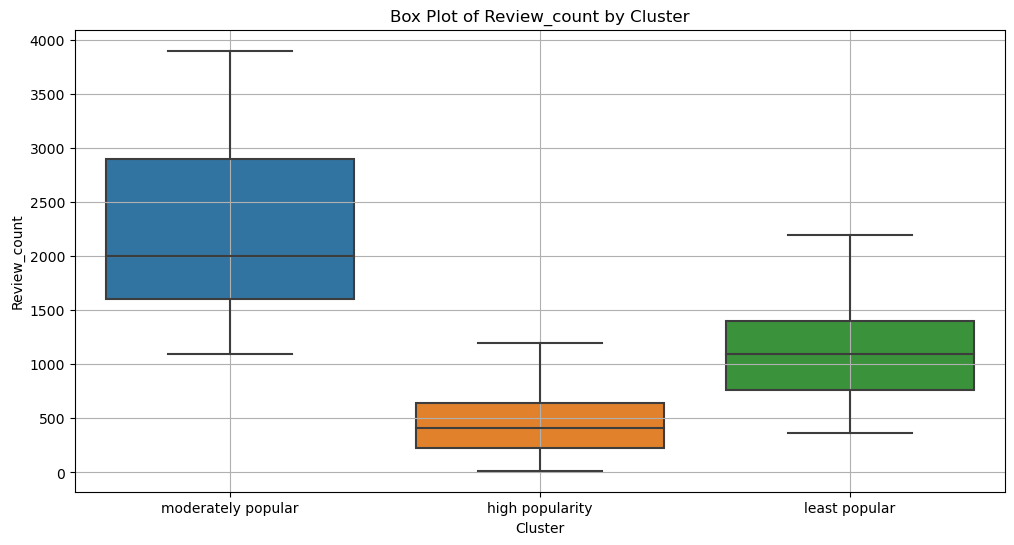

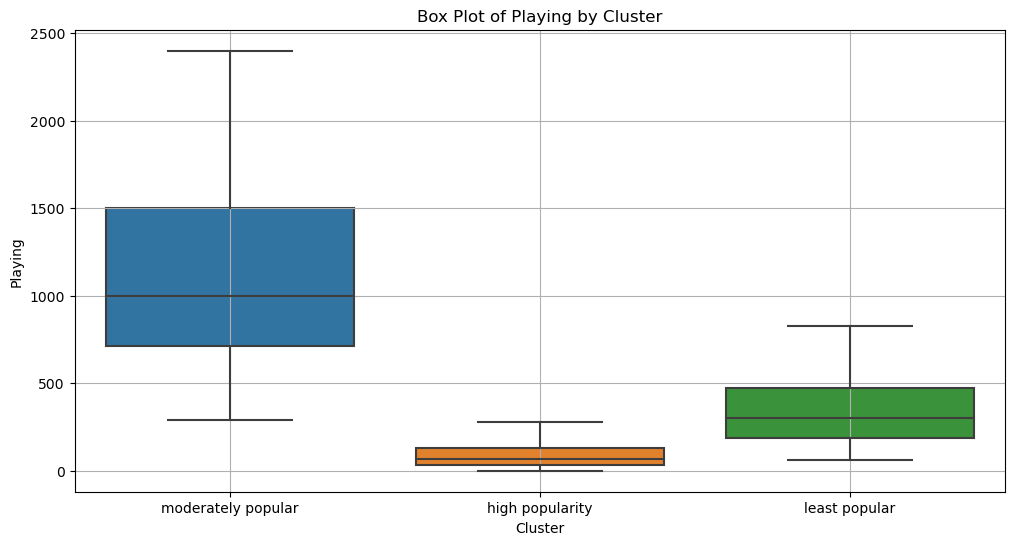

In [46]:
positive_games['cluster4_3']=cluster4_3
# Create box plots for each feature, grouped by cluster
cluster_labels = {0: 'least popular', 2: 'moderately popular', 1: 'high popularity'}

for feature in features3:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster4_3'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

In [47]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster4_3)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6696701645914298


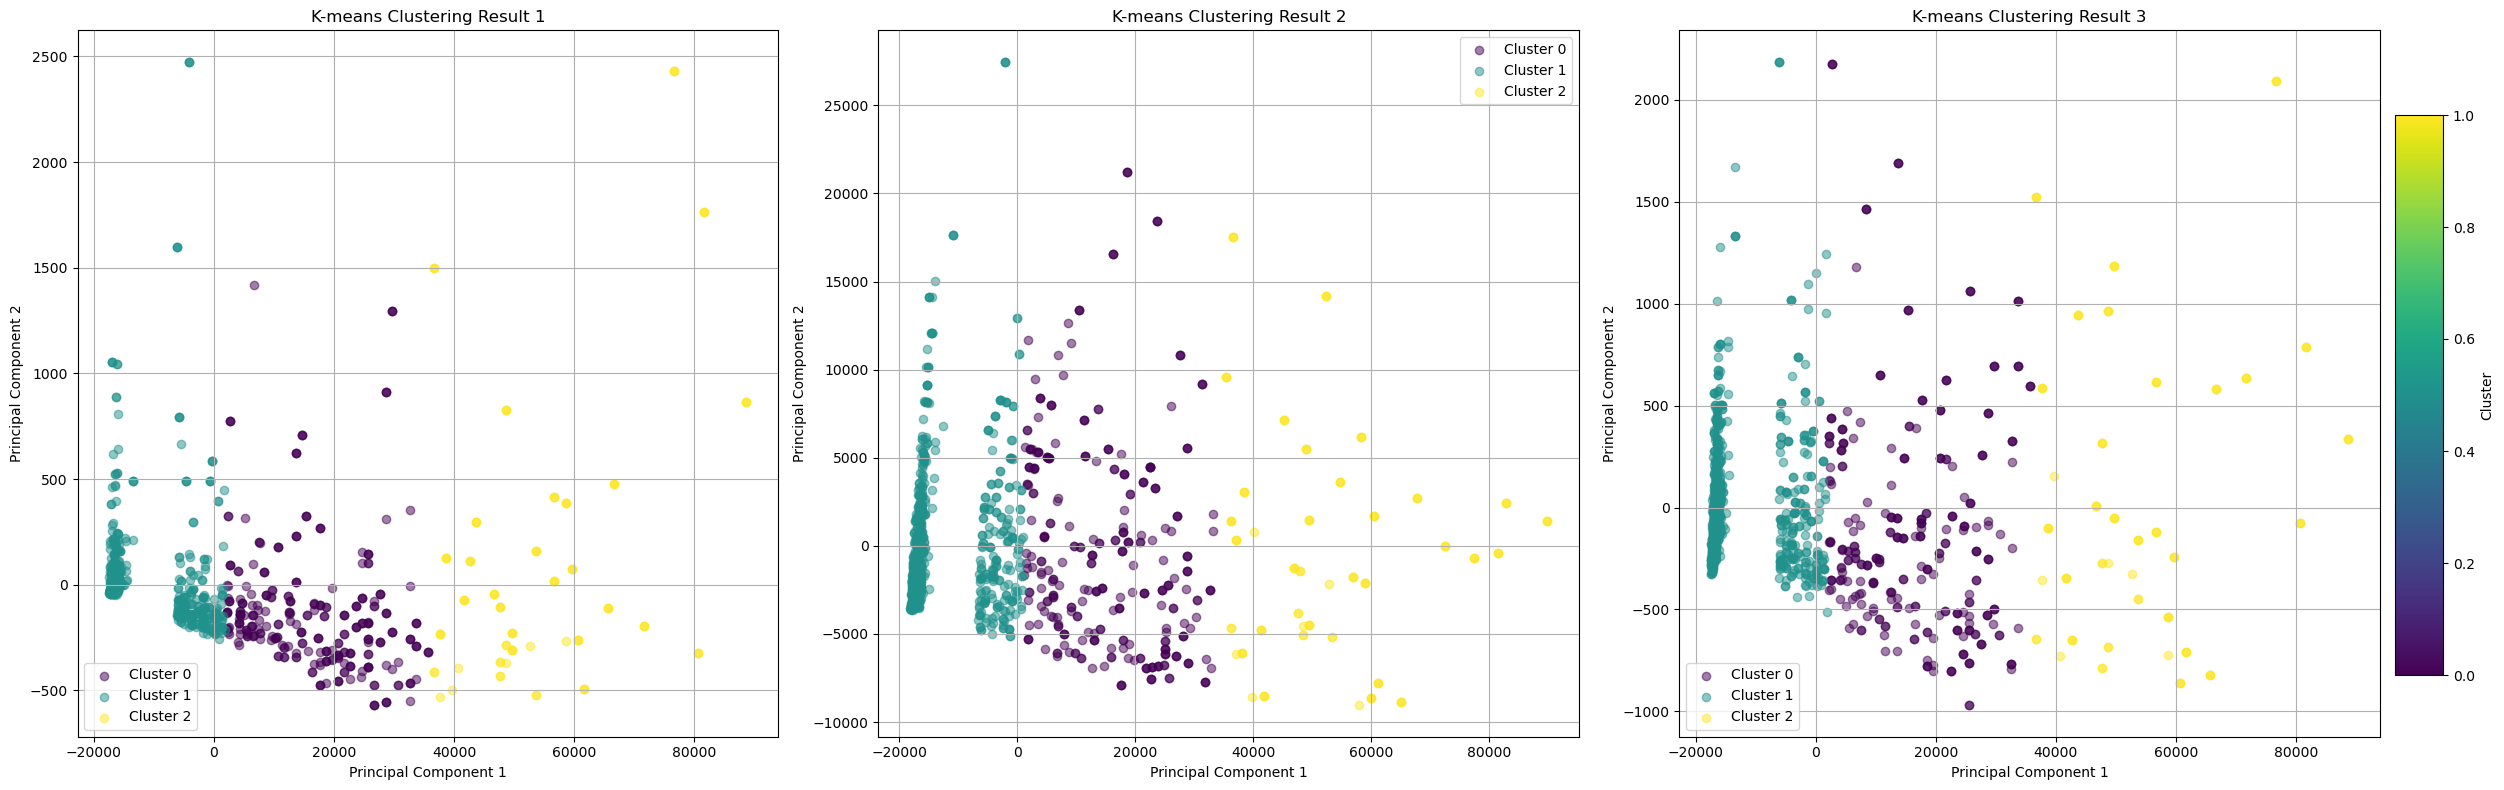

In [48]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(24,8))

# Define unique colors for each cluster
unique_labels = np.unique(cluster3_1)  # Assuming 'cluster1' has the same labels as the other clusters
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Loop through each clustering result and visualize it in a separate subplot
for i, (features, cluster_labels) in enumerate(zip([features, features2, features3], [cluster3_1, cluster5_2, cluster4_3])):
    # Perform PCA to reduce the dimensionality
    pca = PCA(n_components=2)
    features_reduced = pca.fit_transform(features)
    
    # Plot data points with cluster assignments
    for label, color in zip(unique_labels, colors):
        indices = cluster_labels == label
        axes[i].scatter(features_reduced[indices, 0], features_reduced[indices, 1], c=color, cmap='viridis', alpha=0.5, label=f'Cluster {label}')
    
    # Add labels and title
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')
    axes[i].set_title(f'K-means Clustering Result {i+1}')
    axes[i].grid(True)
    axes[i].legend()  # Add legend

# Add color bar legend to the last subplot
plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), cax=cbar_ax, label='Cluster')

plt.tight_layout()
plt.show()

After evaluating the silhouette scores for all three KMeans clustering results, I noticed that the clusters with 3 and 4 variables were around the same value. This suggests that the clustering quality across these 2 different sets of features is comparable. However, since the clustering with all 4 variables provides the most comprehensive representation of the data, capturing various aspects such as rating, user interest, review count, and player engagement, I have decided to proceed with this clustering result.

Additionally, I will experiment with different values of Hyperparameter Tuning and trying different clustering algos to determine if it influences the clustering quality and potentially leads to an improvement in the silhouette score. This approach aims to ensure robustness and consistency in the clustering analysis."

#HYPERPARAMETER TUNING

In [49]:
# Use K-means clustering to identify groups of similar games based on the selected features
#kmeans = KMeans(n_clusters=3, random_state=100,n_init=10, init='k-means++', max_iter=300)
kmeans = KMeans(n_clusters=3, random_state=10000)
kmeans.fit(features3)
clusters = kmeans.predict(features3)

In [50]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, clusters)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6683011606157896


The only hyperparamter that helped to imporved the score is changing the random_state from 42 to 100.
This might have help to reduce noise for this datset that has outliers.

#TRYING DIFFERENT CLUSTERING ALGOS

In [51]:
# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_H1 = hierarchical.fit_predict(features3)

In [52]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster_H1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6524540849279532


In [53]:
# Instantiate DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=3) 

cluster_DBSCAN1=dbscan.fit_predict(features3)

In [54]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster_DBSCAN1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.4927515562784132


A negative silhouette score indicates that the clustering results are worse than random assignment of points to clusters. DBSCAN is most likely not well suited for this data set with only around 1000 datas.

In [55]:
gmm = GaussianMixture(n_components=3, random_state=42)
cluster_GM1 = gmm.fit_predict(features2)

In [56]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features2, cluster_GM1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.35823918908738717


The silhoutte score for Gaussian Mixture Models (GMM) of 0.488 is much lower than kmeans of 0.67. This is due to the data not following a Gaussian distribution and the variables used for clustering are not normalized, GMM may not be the most appropriate choice for clustering. GMM assumes that the data is generated from a mixture of Gaussian distributions, and its performance can be hindered when this assumption is violated.

In conclusion, while hierarchical algo gave a decent silhoutte score of 0.67, the kmeans with 4 varibles and some hyper parameter tuning is the still the best clustering model and will be used for logistics regression. 

K-means produces non-overlapping clusters, which can be easier to interpret than the hierarchical structure produced by hierarchical clustering. Each data point is assigned to one and only one cluster in K-means, whereas in hierarchical clustering, data points can belong to multiple clusters at different levels of the hierarchy. 

Kmeans cluster algo makes it easier to understand and interpret the grouping of data points.

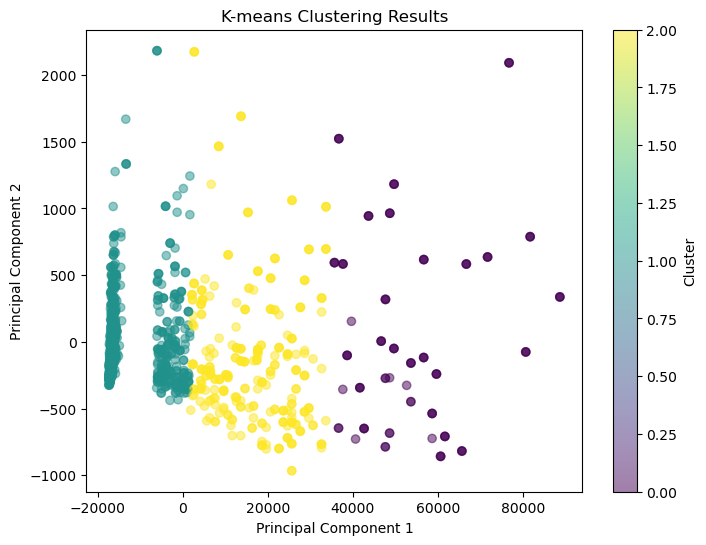

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features3)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot data points with cluster assignments
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results')

# Add color bar legend
plt.colorbar(label='Cluster')

plt.show()


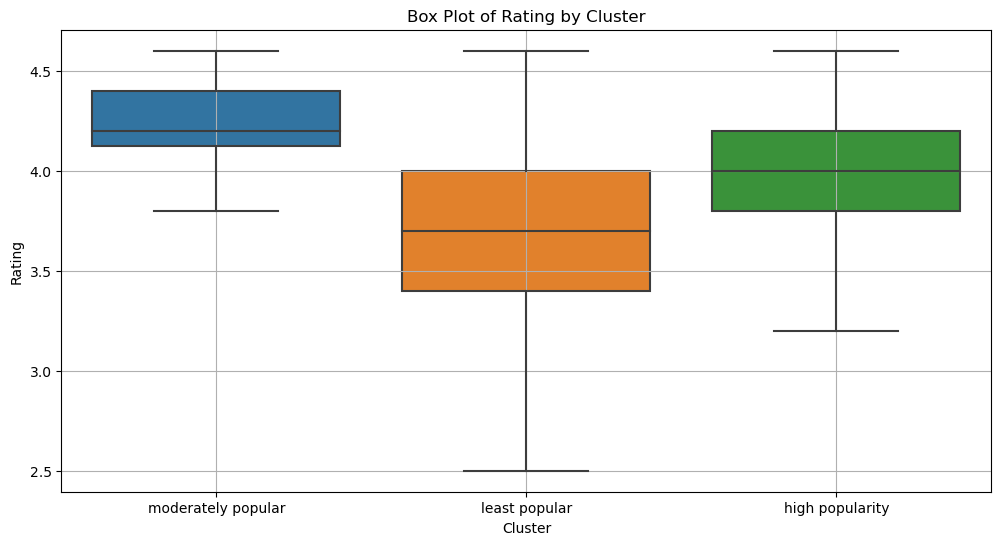

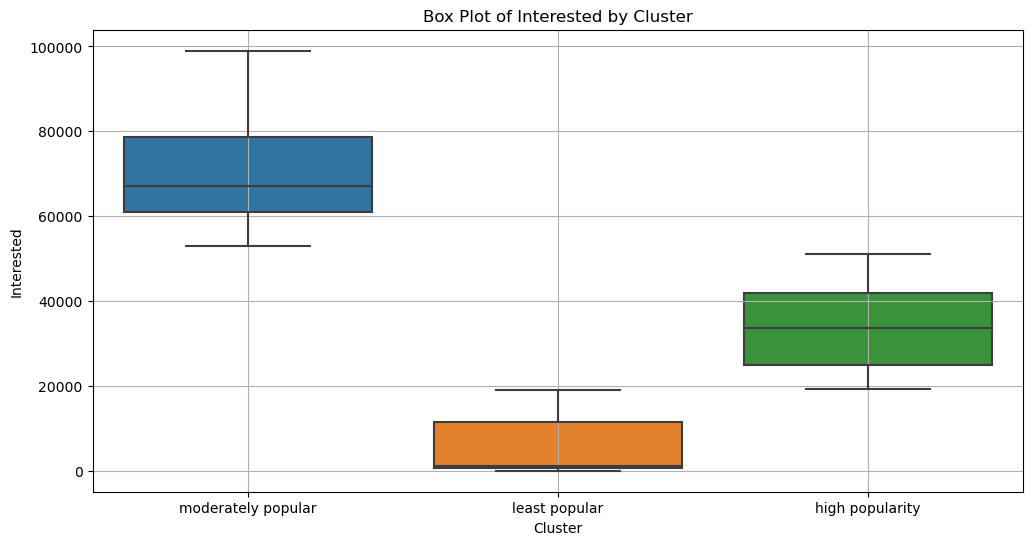

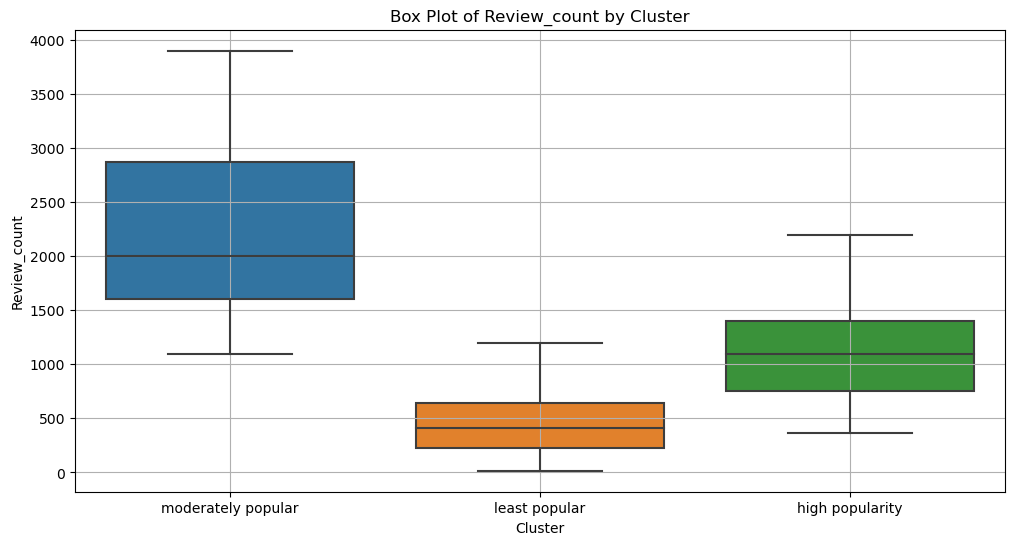

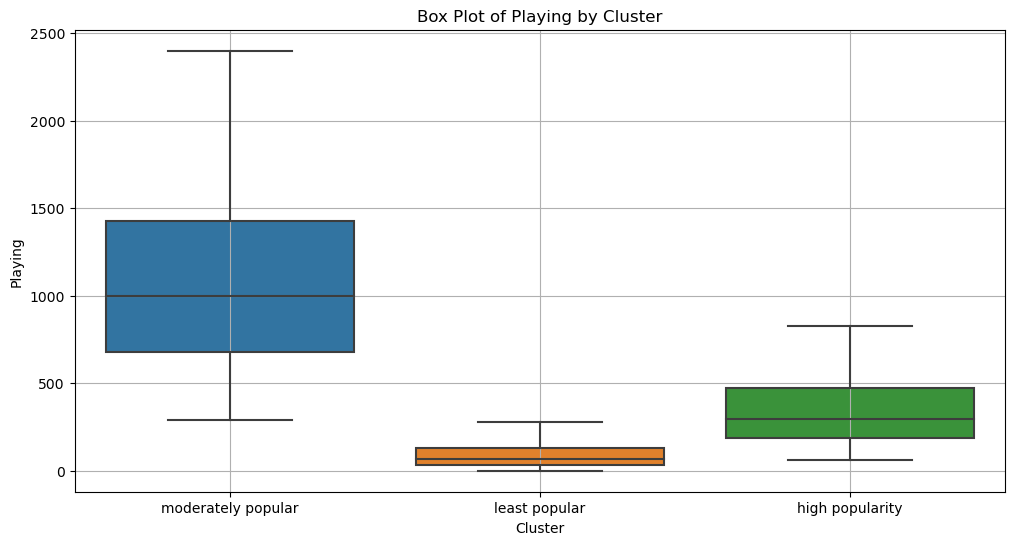

In [58]:
positive_games['clusters']=clusters
# Create box plots for each feature, grouped by cluster
cluster_labels = {1: 'least popular', 0: 'moderately popular', 2: 'high popularity'}

for feature in features3:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['clusters'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

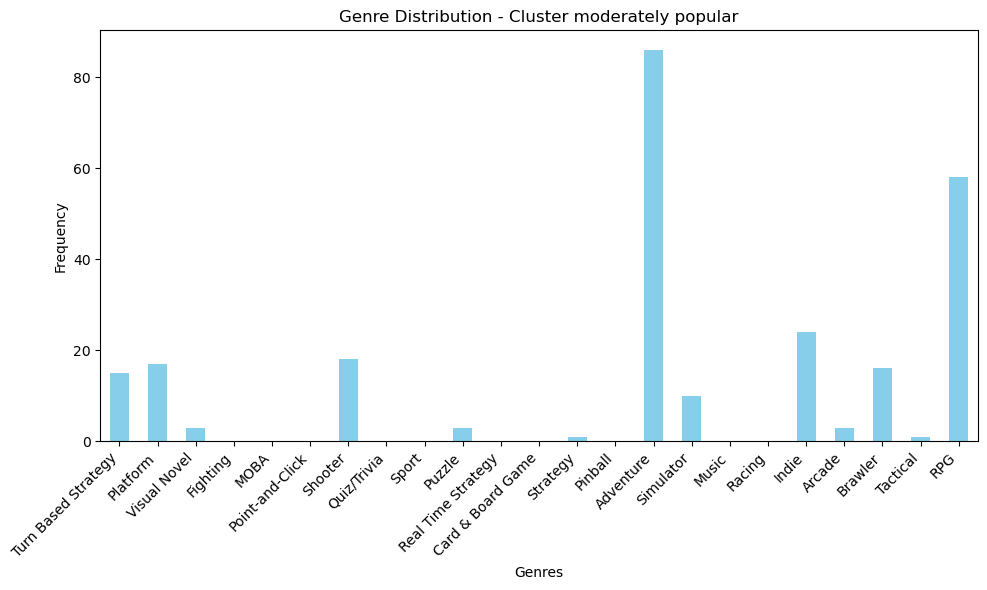

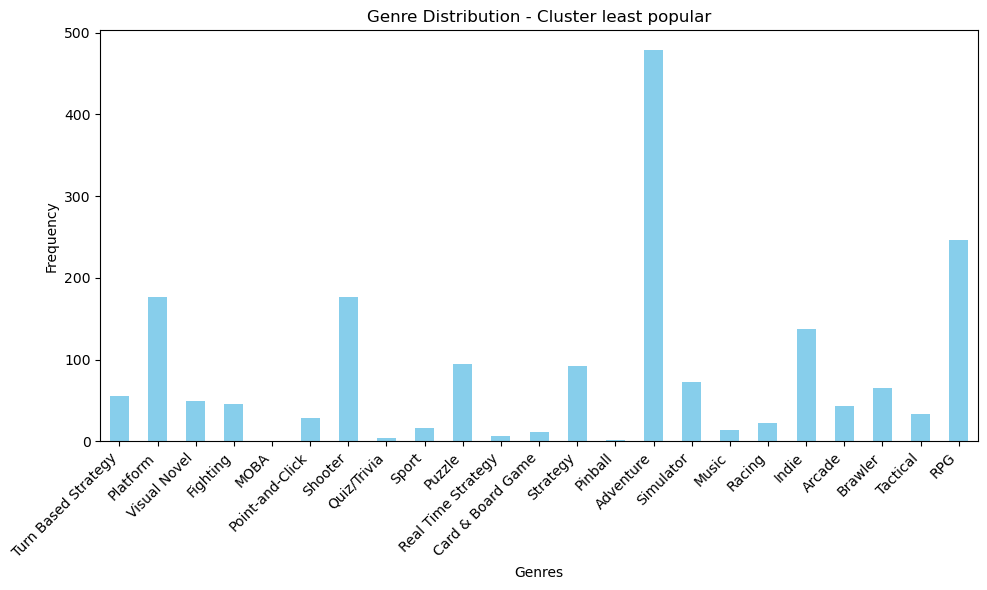

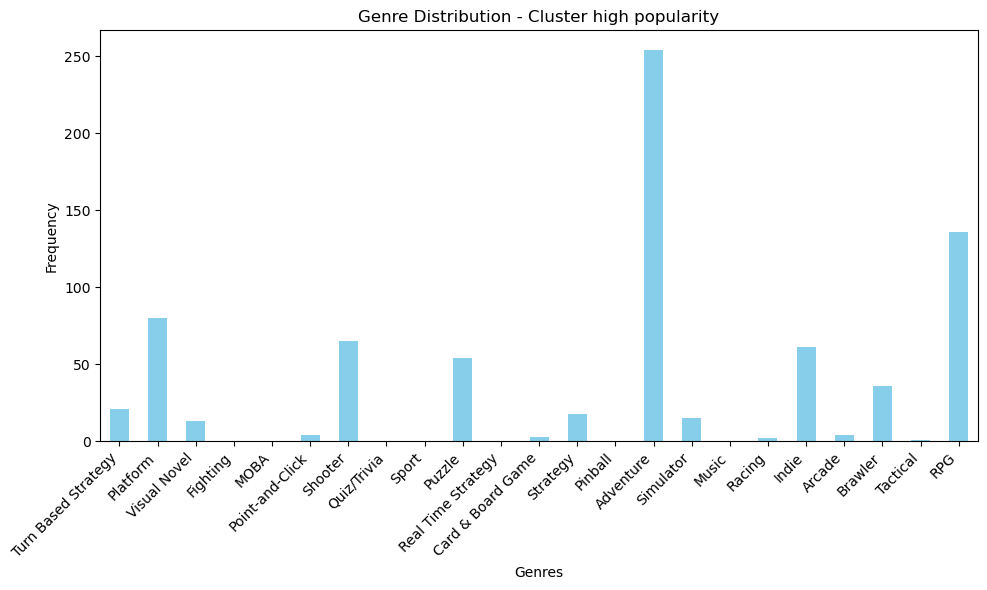

In [59]:
grouped_data = positive_games.groupby('clusters')

# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    cluster_genre_frequencies.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

In [60]:
# Define a function to get the top n genres for each cluster
def top_n_genres(group, n=5):
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    # Sort genres by frequency in descending order
    sorted_genres = cluster_genre_frequencies.sort_values(ascending=False)
    # Get top n genres
    top_n = sorted_genres.head(n)
    return top_n


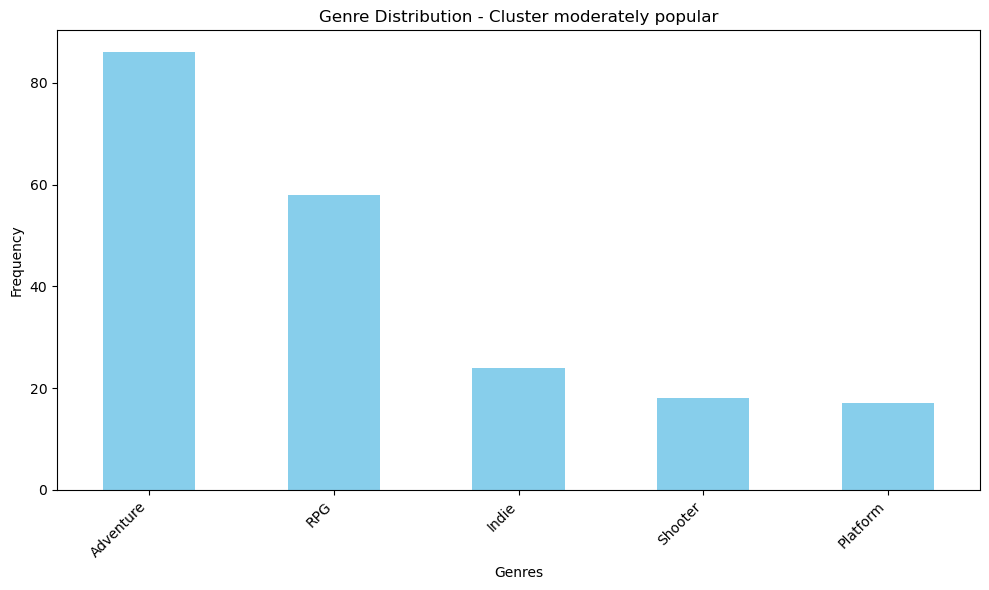

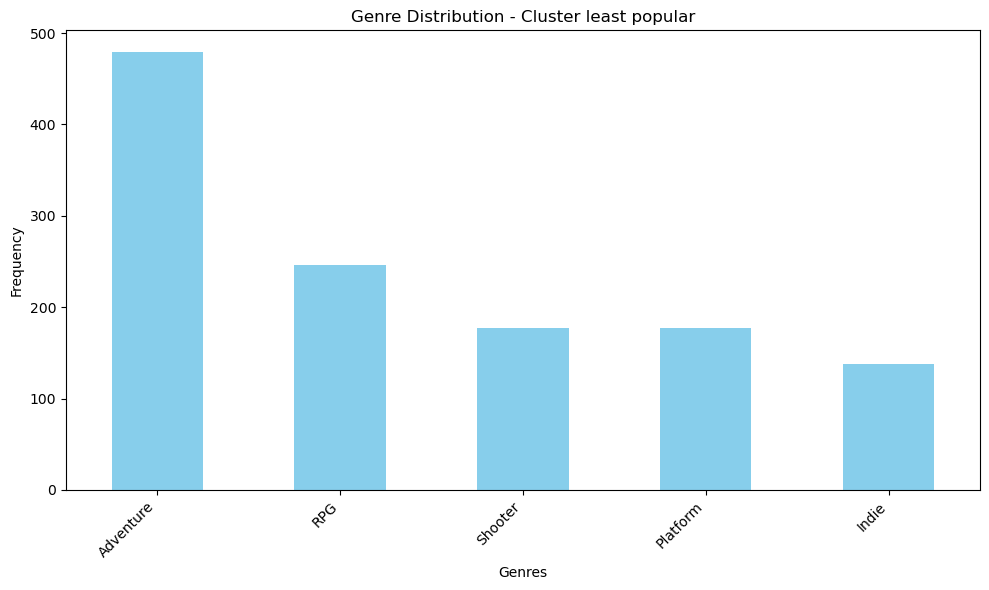

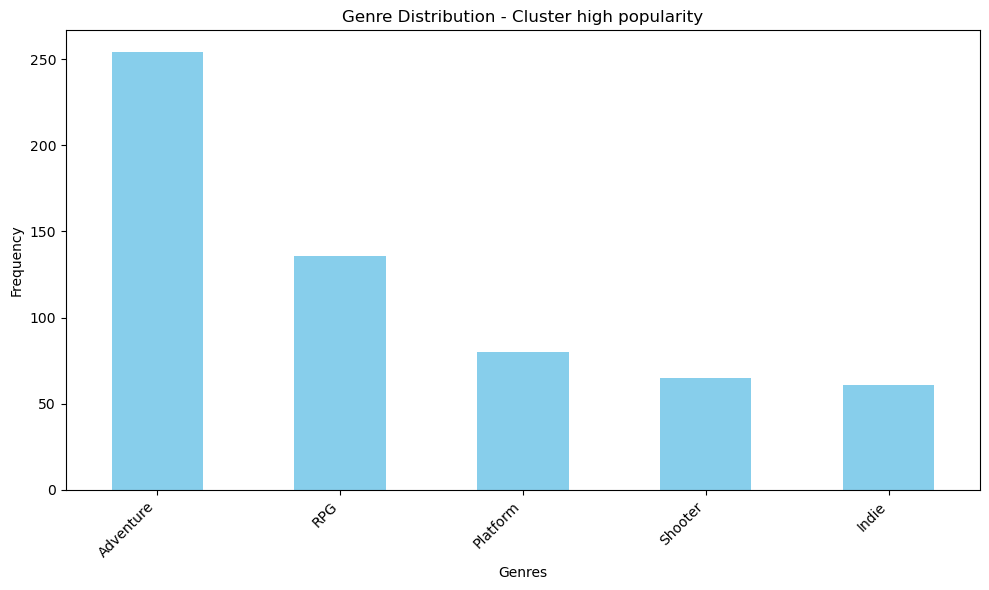

In [61]:
# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Get top 3 genres for the cluster
    top_genres = top_n_genres(group)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    top_genres.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

Across all cluster groups, Adventure and RPG genres consistently emerge as the top two genres, underscoring their universal popularity and enduring appeal among players. With constant high rating over the years as well from EDA, their consistent high frequency indicates a strong preference for immersive storytelling, exploration, and role-playing experiences across diverse player demographics.

these 2 genres can provide a solid foundation for innovation and creativity within the gaming industry. Developers can build upon the established principles and elements of these genres to create new and innovative gaming experiences with other genres.

The varying frequency of Indie and Shooter genres across clusters suggests differences in player engagement levels or preferences. Indie or shooter games can have different, artstyles, achievements goals, storries and more. The varying frequency might mean that only certain indie or shooter games have appealed to players, especially as seen in EDA, where the ratings of both shooting and indie games are either high or low.

Conduct of deeper analysis, possibly through surveys, focus groups, or player interviews, to understand the specific features, themes, and aspects of Indie and Shooter games that appeal to player could be done to find out hwhat time would make the game most likely popular.

According to exploratory data analysis (EDA), Brawler genre actually has been becoming increasingly but slowly popular with constant good ratings since 2006. Despite not being among the top genres in overall popularity, the steady rise in interest and sustained positive ratings suggest a growing niche audience or a resurgence of interest in brawler-style games over time. This fact is furtehr backed up by the fact that the Brawler can only be seen as the top 5 genres in high populairty cluster.

Game developers and publishers can leverage this insight to capitalize on the growing popularity of the Brawler genre by creating innovative and engaging titles that cater to the specific preferences of players interested in dynamic combat and multiplayer interactions characteristic of brawler games.

# MACHINE LEARNING MODELS

# Logistics Regression

Logistic Regression is a statistical model that uses a logistic function to model a binary dependent variable (target variable), which is the clusters made. It is predictive analysis and it classifies the outcome by calculating the probability of that event to occur.

This model is suitable for our problem and dataset to be able to handle high-dimensional feature spaces like TF-IDF matrices.

Using logistic regression with TF-IDF matrix of summaries as features and clusters (e.g., highly popular, moderately popular, low popularity) as the target variable can provide a few insghts

1. INTERPRETING: Logistic regression coefficients can provide insights into the importance of different words or terms in determining the likelihood of a game belonging to a certain popularity cluster. This helps identify key factors contributing to the popularity of games based on their summaries.

2. PREDICTING: It can also effectively classify new games into popularity clusters based on their summary texts. By learning the relationship between the features (keywords in summaries) and the target variable (popularity clusters), the model can make accurate predictions about the popularity level of unseen games.

3. FEATURE IMPORTANCE: Logistic regression coefficients would indicate the importance of different words or terms in determining the popularity clusters of games. Positive coefficients for certain words or terms would suggest that their presence increases the likelihood of a game being classified into a particular popularity cluster, while negative coefficients would indicate the opposite effect.



# MODEL 1 USING CLUSTER (4 variables) with TFIDF FEATURES

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split data into training and testing sets
#(stratified by 'Rating_category')
#X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_positive_summary, positive_games['Rating_category'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix_filtered,
    positive_games['clusters'],
    test_size=0.2,
    random_state=42,
    stratify=positive_games['clusters']  # Ensure proportional class distribution
)

# Train a Logistic Regression model
#model = LogisticRegression(multi_class='ovr', solver='lbfgs')  # Multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # Multi-class classification
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted precision for imbalanced data (optional)
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted recall for imbalanced data (optional)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.788135593220339
Precision: 0.8390645371577575
Recall: 0.788135593220339


# ANALYSIS OF MODEL 1

Accuracy: The model achieves an accuracy of approximately 76.37%, which indicates that about 76.37% of the predictions made by the model are correct.

Precision: The precision of approximately 74.90% suggests that when the model predicts a particular cluster, it is correct about 74.90% of the time. Precision is a measure of the correctness of positive predictions.

Recall: The recall score of approximately 76.37% indicates that the model correctly identifies about 76.37% of all instances belonging to a particular cluster. Recall measures the model's ability to find all relevant instances in the data.

Overall, the model shows decent performance across these metrics.

In [63]:
from sklearn.metrics import classification_report
# Define class labels
class_labels = ['Low Popularity', 'Medium Popularity', 'High Popularity']
# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=class_labels)

# Print class-wise metrics
print("Class-wise Metrics:")
print(class_report)


Class-wise Metrics:
                   precision    recall  f1-score   support

   Low Popularity       1.00      0.16      0.27        19
Medium Popularity       0.76      1.00      0.86       158
  High Popularity       1.00      0.42      0.60        59

         accuracy                           0.79       236
        macro avg       0.92      0.53      0.58       236
     weighted avg       0.84      0.79      0.75       236



Hoever, regardless of overall high precision, accuracy and recall, from the class-wise metrics provided,model 1 while performing quite well in predicting medium popularity games, with a high precision, recall, and F1-score, it struggles with low and high popularity games.

Low Popularity: 

Precision: 1.00   Recall: 0.16      F1-score: 0.27    

High Popularity:  
Precision: 1.00
Recall: 0.42
F1-score: 0.60

This indicates that when the model predicts a game to be in the low popularity class, it's usually correct (high precision). However, it misses a significant number of low popularity games (low recall).

Possible reasons why this is so might be due to class imbalace between the cluster groups and the imbalance could lead the model being biased towards predicting the majoirty class

It might be worth investigating methods to improve predictions for low and high popularity games, considering additional features or adjusting the model parameters.

I will be making model 2 with tuned hyperparameter to help with the class imbalace

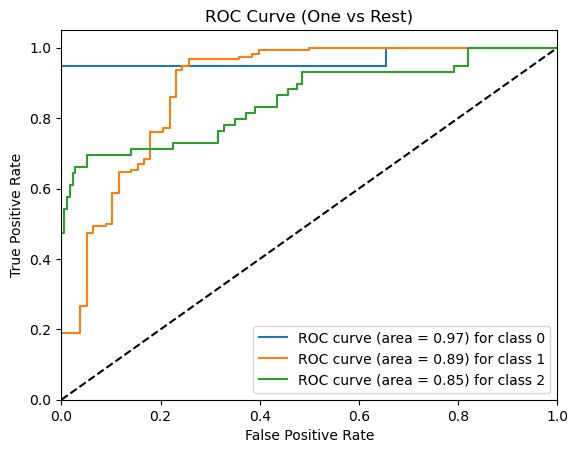

In [80]:
# 2. ROC Curve (One vs Rest)
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_one_vs_rest(y_true, y_pred_proba, classes):
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_true == classes[i]).astype(int), y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], classes[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (One vs Rest)')
    plt.legend(loc="lower right")
    plt.show()

# Assuming y_pred_proba contains the predicted probabilities and classes contains the class labels
plot_roc_curve_one_vs_rest(y_test, model.predict_proba(X_test), classes=[0, 1, 2])

A straight horizontal line in the ROC (Receiver Operating Characteristic) curve indicates that the model's performance is equivalent to random guessing. This means that regardless of the threshold chosen for classification for class 0 "moderately popular", the model's true positive rate (sensitivity) is equal to its false positive rate.

Even if the AUC (Area Under the ROC Curve) for each class is high, a straight horizontal line suggests that the model is not able to effectively distinguish between the classes. This could happen if the model is overly biased towards one class or if the features used for prediction do not provide sufficient information to differentiate between classes.

This insight further proves that there is a class imbalace and i have went to add the code to check the number of data in each cluster. Moderately popualr has overwhelmingly 791 data points while low and high popularity have respectively much lower 299 and 95 datapoints

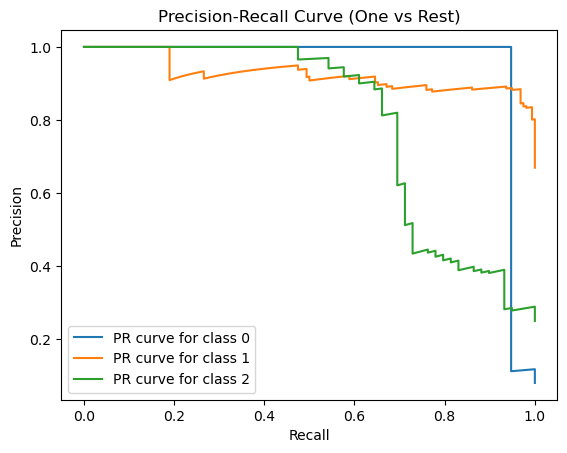

In [81]:
# 3. Precision-Recall Curve (One vs Rest)
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve_one_vs_rest(y_true, y_pred_proba, classes):
    n_classes = len(classes)
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve((y_true == classes[i]).astype(int), y_pred_proba[:, i])
        plt.plot(recall[i], precision[i], label='PR curve for class %s' % (classes[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (One vs Rest)')
    plt.legend(loc="lower left")
    plt.show()
    
# Assuming y_pred_proba contains the predicted probabilities and classes contains the class labels
plot_precision_recall_curve_one_vs_rest(y_test, model.predict_proba(X_test), classes=[0, 1, 2])

A straight horizontal line connecting to a straight vertical line typically indicates a scenario where precision remains constant while recall changes. (blue line).

This can occur when the model's predictions are all of the same class regardless of the threshold, until a certain threshold is reached where suddenly all predictions are switched to the other class.

This behavior could be indicative of certain issues or characteristics of the model or dataset:

Imbalanced dataset: The dataset might be heavily imbalanced, leading to the model predicting the majority class for most thresholds, resulting in constant precision until a point where it starts predicting the minority class.

Threshold insensitivity: The model might not be sensitive to changes in the classification threshold, resulting in little variation in precision until a certain threshold is reached.

In the context of predicting game popularity based on summaries, this behavior suggests that the model is not effectively adapting to the nuances of different popularity levels. It may be overly biased towards predicting one class (e.g., medium popularity) for most thresholds, only changing its prediction to another class (e.g., low or high popularity) at extreme thresholds.

This lack of adaptability can limit the model's usefulness in accurately predicting game popularity based on summaries.

# WIlL NOT BE USING THE DATA GOTTEN UNDER

# LOGISTICS REGRESSION FEATURE IMPORTANCE: COEFFIENT

In [66]:
# Get the coefficients (weights) of each feature
coefficients = model.coef_

# Create a DataFrame to store feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names_filtered, 'Coefficient': coefficients[0]})

# Separate positive and negative coefficients
positive_coeffs = coeff_df[coeff_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
negative_coeffs = coeff_df[coeff_df['Coefficient'] < 0].sort_values(by='Coefficient', ascending=True)

# Print the top N positive features with their coefficients
top_n = 10
print(f"Top {top_n} positive features by importance:")
print(positive_coeffs.head(top_n)[['Feature', 'Coefficient']])

# Print the top N negative features with their coefficients
print(f"\nTop {top_n} negative features by importance:")
print(negative_coeffs.head(top_n)[['Feature', 'Coefficient']])

Top 10 positive features by importance:
                  Feature  Coefficient
4479                   ni     0.950201
2070                elden     0.898999
1533  criticallyacclaimed     0.880647
4729              overrun     0.768746
5873             semester     0.765237
6172                  son     0.732628
6976              uncover     0.729603
7362              witcher     0.714925
3429      internationally     0.712679
1576              cuphead     0.693321

Top 10 negative features by importance:
         Feature  Coefficient
4026       mario    -0.510973
2677        game    -0.470643
4963      player    -0.409530
3284     include    -0.398692
2287  experience    -0.392119
3055        hero    -0.361051
3805        life    -0.355502
7012      unique    -0.346088
5778        save    -0.340621
4253        mode    -0.333989


In [67]:
# Create a DataFrame to store coefficients
coefficients_df = pd.DataFrame(coefficients, columns=feature_names_filtered, index=model.classes_)

# Create empty DataFrames to store top 10 positive and negative coefficients
top_positive_coeffs_df = pd.DataFrame(index=[f'Top {i+1}' for i in range(10)])
top_negative_coeffs_df = pd.DataFrame(index=[f'Top {i+1}' for i in range(10)])

# Iterate over each cluster group to extract top 10 positive and negative coefficients
for cluster in coefficients_df.index:
    # Get top 10 positive coefficients for the current cluster
    top_positive_coeffs = coefficients_df.loc[cluster].nlargest(10)
    top_positive_coeffs_df[cluster] = top_positive_coeffs.values
    
    # Get top 10 negative coefficients for the current cluster
    top_negative_coeffs = coefficients_df.loc[cluster].nsmallest(10)
    top_negative_coeffs_df[cluster] = top_negative_coeffs.values

# Print the DataFrames
print("Top 10 Positive Coefficients:")
print(top_positive_coeffs_df)

print("\nTop 10 Negative Coefficients:")
print(top_negative_coeffs_df)



Top 10 Positive Coefficients:
               0         1         2
Top 1   0.950201  1.087492  0.854698
Top 2   0.898999  0.987390  0.805516
Top 3   0.880647  0.664180  0.758595
Top 4   0.768746  0.662120  0.703629
Top 5   0.765237  0.653941  0.701445
Top 6   0.732628  0.635764  0.678222
Top 7   0.729603  0.612413  0.629210
Top 8   0.714925  0.603539  0.608213
Top 9   0.712679  0.536498  0.605749
Top 10  0.693321  0.501299  0.600677

Top 10 Negative Coefficients:
               0         1         2
Top 1  -0.510973 -1.135103 -0.775097
Top 2  -0.470643 -1.110181 -0.618376
Top 3  -0.409530 -1.039897 -0.594644
Top 4  -0.398692 -1.014935 -0.577860
Top 5  -0.392119 -0.865149 -0.567219
Top 6  -0.361051 -0.700327 -0.491499
Top 7  -0.355502 -0.676268 -0.490845
Top 8  -0.346088 -0.670958 -0.455643
Top 9  -0.340621 -0.663992 -0.446270
Top 10 -0.333989 -0.659186 -0.442044


In [68]:
coefficients_df.head()

,1,11,111,12,124,128,12player,12thcentury,13,135,...,zero,zerog,zeroranger,zestiria,zeus,zombie,zombielike,zombiezapping,zone,zoom
0,-0.112991,-0.020619,-0.020806,-0.014491,-0.015669,-0.005641,-0.010907,-0.027577,-0.036914,-0.006595,...,-0.088796,-0.013517,-0.010506,-0.013499,-0.017057,-0.063957,-0.009666,-0.012752,-0.080774,-0.031076
1,0.305773,0.082382,-0.129603,0.055310,0.064486,0.017574,0.045825,0.123942,0.144556,0.021044,...,0.245290,0.047814,0.034863,0.055113,0.055450,0.241492,0.029318,0.044697,0.083783,0.092098
2,-0.192783,-0.061763,0.150409,-0.040819,-0.048817,-0.011933,-0.034918,-0.096365,-0.107642,-0.014450,...,-0.156493,-0.034297,-0.024357,-0.041614,-0.038393,-0.177535,-0.019652,-0.031945,-0.003009,-0.061023


In [69]:
coefficients_df_transposed = coefficients_df.T.reset_index()
coefficients_df_transposed = coefficients_df_transposed.rename(columns={'index': 'feature'})
coefficients_df_transposed = coefficients_df_transposed.rename(columns={ 0: 'Medium_popularity'})
coefficients_df_transposed = coefficients_df_transposed.rename(columns={ 1: 'Low_popularity'})
coefficients_df_transposed = coefficients_df_transposed.rename(columns={ 2: 'High_popularity'})
coefficients_df_transposed.head()

,feature,Medium_popularity,Low_popularity,High_popularity
0,1,-0.112991,0.305773,-0.192783
1,11,-0.020619,0.082382,-0.061763
2,111,-0.020806,-0.129603,0.150409
3,12,-0.014491,0.055310,-0.040819
4,124,-0.015669,0.064486,-0.048817


In [70]:
coefficients_df_transposed.shape

(7485, 4)

In [71]:
coefficients_df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   feature            7485 non-null   object 
 1   Medium_popularity  7485 non-null   float64
 2   Low_popularity     7485 non-null   float64
 3   High_popularity    7485 non-null   float64
dtypes: float64(3), object(1)
memory usage: 234.0+ KB


In [72]:
# Get the top 10 coefficients for each column
top_10_medium_popularity = coefficients_df_transposed.nlargest(10, 'Medium_popularity')
top_10_low_popularity = coefficients_df_transposed.nlargest(10, 'Low_popularity')
top_10_high_popularity = coefficients_df_transposed.nlargest(10, 'High_popularity')


top_10_medium_popularity.pop("Low_popularity")
top_10_medium_popularity.pop("High_popularity")
top_10_low_popularity.pop("Medium_popularity")
top_10_low_popularity.pop("High_popularity")
top_10_high_popularity.pop("Low_popularity")
top_10_high_popularity.pop("Medium_popularity")

# Print the top 10 coefficients for each column

print("\nTop 10 positive Coefficients for Low Popularity:")
print(top_10_low_popularity)

print("Top 10 postive Coefficients for Medium Popularity:")
print(top_10_medium_popularity)

print("\nTop 10 positve Coefficients for High Popularity:")
print(top_10_high_popularity)


Top 10 positive Coefficients for Low Popularity:
      feature  Low_popularity
4996   pokmon        1.087492
4963   player        0.987390
6616     team        0.664180
3284  include        0.662120
682    battle        0.653941
5981  shooter        0.635764
2786     good        0.612413
114         4        0.603539
2749     girl        0.536498
961      bros        0.501299
Top 10 postive Coefficients for Medium Popularity:
                  feature  Medium_popularity
4479                   ni           0.950201
2070                elden           0.898999
1533  criticallyacclaimed           0.880647
4729              overrun           0.768746
5873             semester           0.765237
6172                  son           0.732628
6976              uncover           0.729603
7362              witcher           0.714925
3429      internationally           0.712679
1576              cuphead           0.693321

Top 10 positve Coefficients for High Popularity:
        feature  High_po

Positive coefficients in logistic regression represent the features that are positively associated with the respective cluster group (game popularity). They indicate that an increase in the value of the feature is associated with an increase in the likelihood of the game being classified as highly popular in the high-popularity cluster and so on. We focus on positive coefficients because they provide insights into the keywords(which might show whatcontent the players look forward to) that contribute to higher popularity ratings for games.

Low Popularity:
The top features associated with low popularity include "portal," "bioshock," "experience," and "yakuza." These coefficients suggest that games featuring these elements are more likely to have lower popularity ratings. 

Medium Popularity:
Features like "player," "pokémon," "king," and "shooter" have the highest positive coefficients for games with medium popularity. This indicates that games with elements related to these features are more likely to fall into the medium popularity category.

High Popularity:
The top positive coefficients for high popularity include features like "elden," "cuphead," "shin," and "critically acclaimed." These coefficients suggest that games featuring these elements are more likely to be classified as highly popular among players.

In [73]:
keywords = ['elden', 'cuphead', 'shin', 'criticallyacclaimed', 'megami', 'tensei', 'child', 'overrun', 'hell', 'resident']

# Create a filter condition using str.contains() and the specified keywords
popular_Genre = positive_games[positive_games['Summary'].str.contains('|'.join(keywords), case=False)]

In [74]:
popular_Genre

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count,...,Arcade,Brawler,Tactical,RPG,LanguageDetection,Sentiment,cluster3_1,cluster5_2,cluster4_3,clusters
0,Elden Ring,"['Adventure', 'RPG']",Elden Ring is a fantasy action and open world ...,The first playthrough of elden ring is one of ...,4.5,3800.0,2022,94000.0,17000.0,3900.0,...,0,0,0,1,"(en, 0.9999973019652274)",0.217273,2,2,2,0
2,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A small child falls into the Underground where...,soundtrack is tied for 1 with nier automata a...,4.2,679.0,2015,67000.0,28000.0,3500.0,...,0,0,0,1,"(en, 0.9999978910952749)",0.181019,2,2,2,0
5,Omori,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turnbased surreal horror RPG in which a chil...,The best game Ive played in my life omori is a...,4.2,1100.0,2020,83000.0,7200.0,1600.0,...,0,0,0,1,"(en, 0.9999970426011895)",0.041188,2,2,2,0
6,Metroid Dread,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,Have only been a Metroid fan for couple of yea...,4.3,759.0,2021,67000.0,9200.0,2100.0,...,0,0,0,0,"(en, 0.9999983342411928)",0.066000,2,2,2,0
8,NieR: Automata,"['Brawler', 'RPG']",NieR Automata tells the story of androids 2B 9...,Holy shit im carrying the weight of the wooooo...,4.3,1100.0,2017,98000.0,18000.0,2900.0,...,0,1,0,1,"(en, 0.9999975993430741)",0.110714,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Tales of Zestiria,['RPG'],Tales of Zestiria is a Japanese roleplaying ga...,lol Eu realmente tenho vrios sentimentos confu...,2.7,76.0,2015,1264.0,1700.0,273.0,...,0,0,0,1,"(en, 0.9999966065220096)",0.040441,1,1,1,1
1322,Legacy of Kain: Soul Reaver,['Adventure'],A thirdperson actionadventure game in which af...,This is Goth Zelda positive No es difcil enten...,3.7,22.0,1999,1161.0,1300.0,260.0,...,0,0,0,0,"(en, 0.9999971500649181)",0.105682,1,1,1,1
1346,Mario Hoops 3-on-3,['Sport'],Get that magic touch There are plenty of baske...,Mario sports titles certainly arent uncommon i...,3.5,2.0,2006,203.0,1800.0,132.0,...,0,0,0,0,"(en, 0.9999976724000619)",0.204832,1,1,1,1
1369,Shantae and the Seven Sirens,"['Adventure', 'Platform']",Formerly referred to as Shantae 5 Shantae and ...,And with this entry I think my interest in any...,3.5,31.0,2020,715.0,512.0,118.0,...,0,0,0,0,"(en, 0.999997868916539)",0.119126,1,1,1,1


In [75]:
popular_Genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 1394
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                155 non-null    object 
 1   Genres               155 non-null    object 
 2   Summary              155 non-null    object 
 3   Reviews              155 non-null    object 
 4   Rating               155 non-null    float64
 5   Playing              155 non-null    float64
 6   Year                 155 non-null    int32  
 7   Interested           155 non-null    float64
 8   Total Plays          155 non-null    float64
 9   Review_count         155 non-null    float64
 10  Turn Based Strategy  155 non-null    int64  
 11  Platform             155 non-null    int64  
 12  Visual Novel         155 non-null    int64  
 13  Fighting             155 non-null    int64  
 14  MOBA                 155 non-null    int64  
 15  Point-and-Click      155 non-null    in

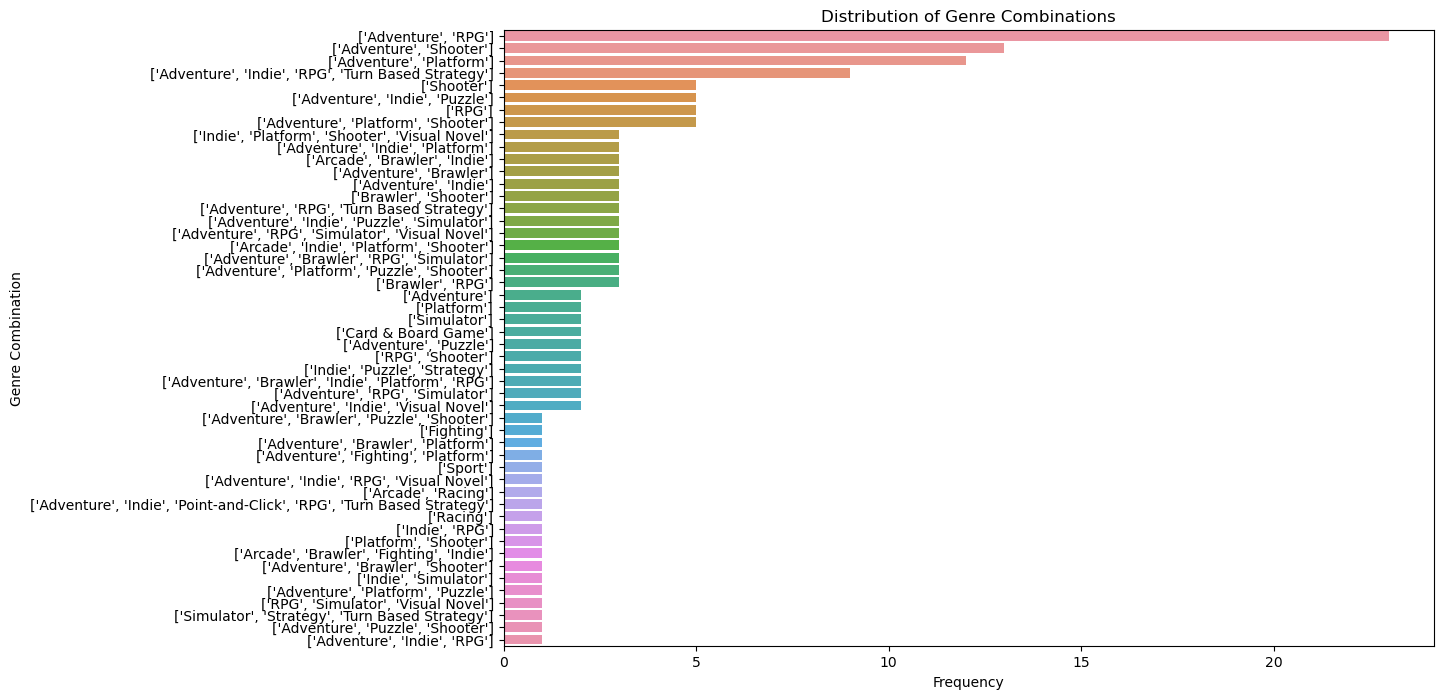

In [76]:
# Plot the distribution of genre combinations
plt.figure(figsize=(12, 8))
sns.countplot(y='Genres', data=popular_Genre, order=popular_Genre['Genres'].value_counts().index)
plt.title('Distribution of Genre Combinations')
plt.xlabel('Frequency')
plt.ylabel('Genre Combination')
plt.show()

In [77]:
from scipy.stats import f_oneway

# Extracting numerical variables
numerical_vars = ['Rating', 'Interested', 'Playing', 'Total Plays', 'Review_count']

# Performing ANOVA for each numerical variable
for var in numerical_vars:
    # Extracting data for ANOVA
    genre_groups = []
    for genre in popular_Genre['Genres'].unique():
        genre_groups.append(popular_Genre[popular_Genre['Genres'] == genre][var])
    
    # Performing ANOVA
    f_statistic, p_value = f_oneway(*genre_groups)
    
    # Print results
    print(f"ANOVA for {var}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("The differences in means are statistically significant.")
    else:
        print("The differences in means are not statistically significant.")
    print()


ANOVA for Rating:
F-statistic: 2.148697500150257
P-value: 0.0005608083204695006
The differences in means are statistically significant.

ANOVA for Interested:
F-statistic: 2.9913109680474026
P-value: 1.3507097598079853e-06
The differences in means are statistically significant.

ANOVA for Playing:
F-statistic: 1.5766546050907722
P-value: 0.026859234781334656
The differences in means are statistically significant.

ANOVA for Total Plays:
F-statistic: 3.3922314545936363
P-value: 8.146682803974281e-08
The differences in means are statistically significant.

ANOVA for Review_count:
F-statistic: 1.9216763016736704
P-value: 0.00274838169683355
The differences in means are statistically significant.



ANOVA, or Analysis of Variance, is a statistical method used to compare the means of three or more groups. It helps us understand if there are significant differences between the average values of different groups.

For our case, it will help us check if there is a variance of 'Rating', 'Interested', 'Playing', 'Total Plays', 'Review_count' across the different combinations of genres. If ANOVA indicates a significant difference of average values of these variables across the genres, it most likely indicated that there is a possible relationship between genre and the numerical variables.

In hypothesis testing, the significance level, often denoted by α (alpha), is typically set to 0.05. 

As can see from the p values, all the numerical variables might have a relationship with the genres combinations.

Hence, I will be using these variables to get the top 10 genre cobimations.

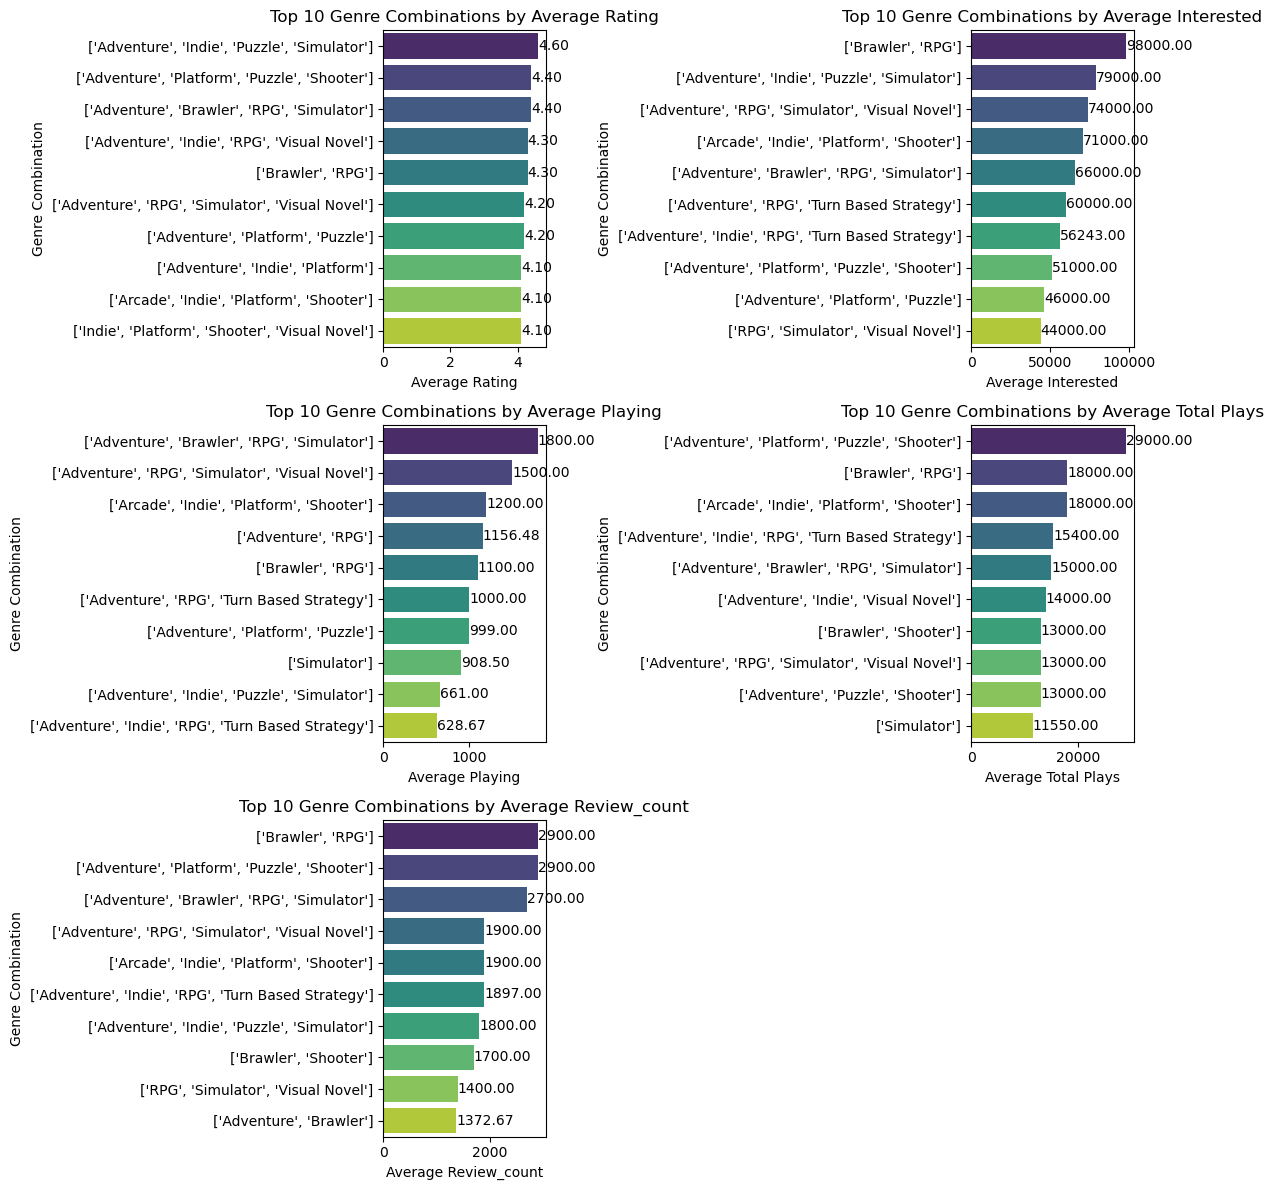

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical variables to include in the plot
numerical_variables = ['Rating', 'Interested', 'Playing', 'Total Plays', 'Review_count']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each numerical variable
for i, variable in enumerate(numerical_variables):
    # Group the data by genre combinations and calculate the average for the current variable
    genre_average = popular_Genre.groupby('Genres')[variable].mean().reset_index()
    
    # Sort the genre combinations based on their average value for the current variable
    top_10_genres = genre_average.sort_values(by=variable, ascending=False).head(10)
    
    # Plot the top 10 genre combinations for the current variable
    sns.barplot(x=variable, y='Genres', data=top_10_genres, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 10 Genre Combinations by Average {variable}')
    axes[i].set_xlabel(f'Average {variable}')
    axes[i].set_ylabel('Genre Combination')

    # Add average values on the bars
    for index, value in enumerate(top_10_genres[variable]):
        axes[i].text(value, index, f'{value:.2f}', ha='left', va='center', color='black')

# Hide the unused subplots
for j in range(len(numerical_variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



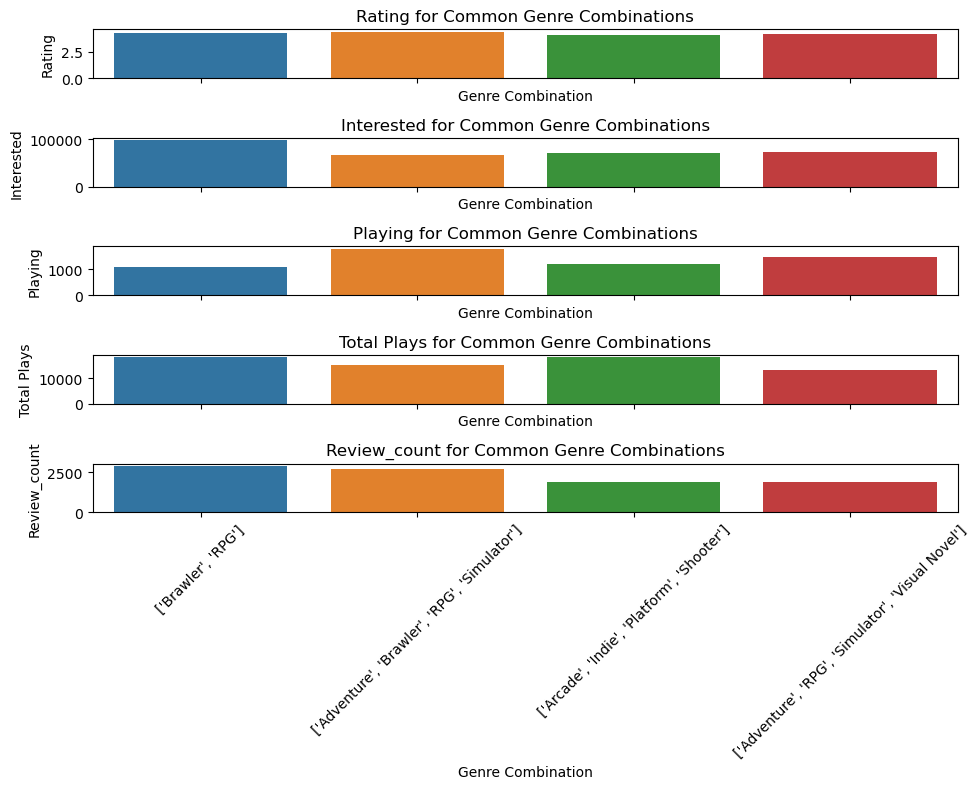

In [79]:
# Get the top genre combinations for each numerical variable
top_genre_combinations = {}
for variable in numerical_variables:
    genre_average = popular_Genre.groupby('Genres')[variable].mean().reset_index()
    top_genre_combinations[variable] = genre_average.sort_values(by=variable, ascending=False).head(10)['Genres'].tolist()

# Find the common genre combinations
common_genre_combinations = set(top_genre_combinations[numerical_variables[0]])
for variable in numerical_variables[1:]:
    common_genre_combinations.intersection_update(top_genre_combinations[variable])

# Filter the genre average data for the common genre combinations
common_genre_average = popular_Genre[popular_Genre['Genres'].isin(common_genre_combinations)]

# Plot the common genre combinations for each numerical variable
fig, axes = plt.subplots(len(numerical_variables), figsize=(10, 8), sharex=True)
for i, variable in enumerate(numerical_variables):
    sns.barplot(x='Genres', y=variable, data=common_genre_average, ax=axes[i])
    axes[i].set_title(f'{variable} for Common Genre Combinations')
    axes[i].set_ylabel(variable)
    axes[i].set_xlabel('Genre Combination')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
